# Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Data visualization
- Model building and evaluation

In [1568]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization


from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error


import warnings
warnings.filterwarnings('ignore')

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1569]:
# reading the dataset
train = pd.read_csv("train.csv")

In [1570]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1571]:
train.shape

(1460, 81)

In [1572]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1573]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# 2. Data Cleaning

In [1574]:
print ("Missing Values of train dataset: ")
missing = np.sum(train.isnull())
missing[missing>0].sort_values(ascending = False)

Missing Values of train dataset: 


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [1575]:
(missing[missing>0]/train.shape[0]).sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

#### Cleaning the columns where null value percentage greater than 85% Alley,PoolQC,MiscFeature.
- 1. according to the data dictonary Alley - NA = No alley access and it has around 93.47% 
    so it can be considered as a single value and dropped
- 2. PoolQC column NA = No pool. Since it has  99.52% NA values, we can considered it as single value and hence dropped.
- 3. MiscFeature is having 96.30% null values , hence we will consider it as single value and it can be removed.

In [1576]:
print("----------Alley Value Count---------")
print(train["Alley"].value_counts())
print("----------PoolQC Value Count---------")
print(train["PoolQC"].value_counts())
print("----------MiscFeature Value Count---------")
print(train["MiscFeature"].value_counts())


----------Alley Value Count---------
Grvl    50
Pave    41
Name: Alley, dtype: int64
----------PoolQC Value Count---------
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
----------MiscFeature Value Count---------
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [1577]:
#dropping features that have more than 85% missing
train.drop(['PoolQC', 'MiscFeature', 'Alley'], axis = 1 ,inplace=True)

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea Fence MiscVal  \
0    AllPub    Inside  ...         0           0        0   NaN       0   
1    AllPub       FR2  ...         0           0        0   NaN       0   
2    AllPub    Inside  ...         0           0        0   NaN       0   
3    AllPub    Corner  ...         0           0        0   NaN       0   
4    AllPub       FR2  ...         0           0        0   NaN       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      2    2008        WD         Normal     208500  
1      5    2007        WD         Normal     181500  
2      9    2008        WD         Normal     223500  
3      2    2006        WD        Abnorml     140000  
4     12    2008        WD         Normal     250000  

[5 rows x 78 columns]

In [1578]:
train.shape

(1460, 78)

# Checking for Duplicate records

#### Before deleting the 85% has the same value in the columns lets check for the duplicates are exist in the dataset.

In [1579]:
print(train.shape)
#check the duplicate reords
print(train.duplicated(subset=None, keep='first').count())

(train[train.duplicated(keep=False)])

(1460, 78)
1460


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 78 columns]

- NoDuplkicate reords Found!
- houseDF data shape also has only 1460 rows so it is observed that there is no duplicate records.

# Checking Value counts for each columns

In [1580]:
for col in train:
    print(col + " value counts: ")
    print(train[col].value_counts() , "\n\n")

Id value counts: 
1       1
982     1
980     1
979     1
978     1
977     1
976     1
975     1
974     1
973     1
972     1
971     1
970     1
969     1
968     1
967     1
966     1
965     1
964     1
963     1
962     1
981     1
983     1
960     1
984     1
1003    1
1002    1
1001    1
1000    1
999     1
998     1
997     1
996     1
995     1
994     1
993     1
992     1
991     1
990     1
989     1
988     1
987     1
986     1
985     1
961     1
959     1
914     1
936     1
934     1
933     1
932     1
931     1
930     1
929     1
928     1
927     1
926     1
925     1
924     1
923     1
922     1
921     1
920     1
919     1
918     1
917     1
916     1
935     1
937     1
958     1
938     1
957     1
956     1
955     1
954     1
953     1
952     1
951     1
950     1
949     1
948     1
947     1
946     1
945     1
944     1
943     1
942     1
941     1
940     1
939     1
1004    1
1005    1
1006    1
1073    1
1071    1
1070    1
1069    1
1068    1
10

### We can delete those columns which is having more than 90% has the same value

In [1581]:
#90% of total data
1460*90/100

1314.0

In [1582]:
columnList = []   
for col in (train):
    if(train[col].value_counts().max() >= 1314):
        columnList.append(col)


# Remove the columns with skewed data
print(columnList)
train.drop(columnList, axis = 1, inplace = True)

train.head()

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig Neighborhood Condition1  ... GarageQual WoodDeckSF  OpenPorchSF  \
0    Inside      CollgCr       Norm  ...         TA          0           61   
1       FR2      Veenker      Feedr  ...         TA        298            0   
2    Inside      CollgCr       Norm  ...         TA          0           42   
3    Corner      Crawfor       Norm  ...         TA          0           35   
4       FR2      NoRidge       Norm  ...         TA        192           84   

   EnclosedPorch  Fence  MoSold YrSold SaleType SaleCondition SalePrice  
0              0    NaN       2   2008       WD        Normal    208500  
1              0    NaN       5   2007       WD        Normal    181500  
2              0    NaN       9   2008       WD        Normal    223500  
3            272    NaN       2   2006       WD       Abnorml    140000  
4              0    NaN      12   2008       WD        Normal    250000  

[5 rows x 60 columns]

- as these columns has maximum value percentage has 90% we can see some skewness in the data if it is there in the dataset. Hence those can be dropped.
- We can also drop ID column - as there is no use of that column

In [1583]:
train.drop("Id", axis = 1, inplace = True)

train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType  ... GarageQual  WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...         TA           0           61   
1      Veenker      Feedr     1Fam  ...         TA         298            0   
2      CollgCr       Norm     1Fam  ...         TA           0           42   
3      Crawfor       Norm     1Fam  ...         TA           0           35   
4      NoRidge       Norm     1Fam  ...         TA         192           84   

   EnclosedPorch  Fence MoSold YrSold SaleType SaleCondition  SalePrice  
0              0    NaN      2   2008       WD        Normal     208500  
1              0    NaN      5   2007       WD        Normal     181500  
2              0    NaN      9   2008       WD        Normal     223500  
3            272    NaN      2   2006       WD       Abnorml     140000  
4              0    NaN     12   2008       WD        Normal     250000  

[5 rows x 59 columns]

In [1584]:
train.shape

(1460, 59)

In [1585]:
print ("Missing Values of train dataset: ")
missing = np.sum(train.isnull())
missing[missing>0].sort_values(ascending = False)

Missing Values of train dataset: 


Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
dtype: int64

In [1586]:
(missing[missing>0]/train.shape[0]).sort_values(ascending = False)

Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
dtype: float64

 - checking for fence has an impact on sales price or not

# 3.Data preparation & EDA

In [1587]:
# impute the value to fence columns
train["Fence"] = train["Fence"].astype('str')
train["Fence"] = train["Fence"].str.replace("nan", "No Fence")

print(train["Fence"].describe())
print(train["Fence"].value_counts())

count         1460
unique           5
top       No Fence
freq          1179
Name: Fence, dtype: object
No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64


In [1588]:
# impute the value to nullable rows for GarageFinish
train["GarageFinish"] = train["GarageFinish"].fillna("No Garage")

In [1589]:
# imputing vaules to LotFrontage
print(train["LotFrontage"].describe())
print(train["LotFrontage"].value_counts())
train["LotFrontage"] = train["LotFrontage"].replace(np.nan, train["LotFrontage"].median())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0 

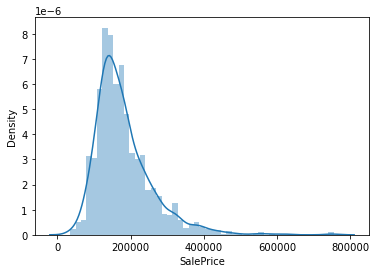

In [1590]:
# train['SalePrice'].plot(kind='hist', figsize = (20,10), bins =50)
sns.distplot(train['SalePrice'])
plt.show()

 - ###  Sale price is heavily right-skewed, so need a log transformation to correct skewness

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

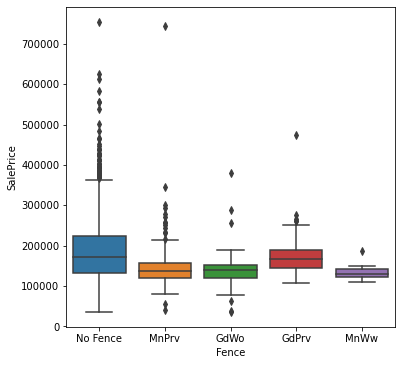

In [1591]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = train)

-  80% of the data does not contain fence 

#### analyzing and imputing basement related columns

In [1592]:
train["BsmtQual"] = train["BsmtQual"].fillna("None")
train["BsmtQual"].value_counts()
train["BsmtQual"].value_counts()/len(train)*100

TA      44.452055
Gd      42.328767
Ex       8.287671
None     2.534247
Fa       2.397260
Name: BsmtQual, dtype: float64

In [1593]:
train["BsmtCond"] = train["BsmtCond"].fillna("None")
train["BsmtCond"].value_counts()
train["BsmtCond"].value_counts()/len(train)*100

TA      89.794521
Gd       4.452055
Fa       3.082192
None     2.534247
Po       0.136986
Name: BsmtCond, dtype: float64

In [1594]:
train["BsmtExposure"] = train["BsmtExposure"].fillna("None")
train["BsmtExposure"].value_counts()
train["BsmtExposure"].value_counts()/len(train)*100

No      65.273973
Av      15.136986
Gd       9.178082
Mn       7.808219
None     2.602740
Name: BsmtExposure, dtype: float64

In [1595]:
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None")
train["BsmtFinType1"].value_counts()
train["BsmtFinType1"].value_counts()/len(train)*100

Unf     29.452055
GLQ     28.630137
ALQ     15.068493
BLQ     10.136986
Rec      9.109589
LwQ      5.068493
None     2.534247
Name: BsmtFinType1, dtype: float64

In [1596]:
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("None")
train["BsmtFinType2"].value_counts()
train["BsmtFinType2"].value_counts()/len(train)*100

Unf     86.027397
Rec      3.698630
LwQ      3.150685
None     2.602740
BLQ      2.260274
ALQ      1.301370
GLQ      0.958904
Name: BsmtFinType2, dtype: float64

In [1597]:
# basement columns:
house_Basement = train[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]

In [1598]:
house_Basement

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
0          Gd       TA           No          GLQ          Unf         706   
1          Gd       TA           Gd          ALQ          Unf         978   
2          Gd       TA           Mn          GLQ          Unf         486   
3          TA       Gd           No          ALQ          Unf         216   
4          Gd       TA           Av          GLQ          Unf         655   
5          Gd       TA           No          GLQ          Unf         732   
6          Ex       TA           Av          GLQ          Unf        1369   
7          Gd       TA           Mn          ALQ          BLQ         859   
8          TA       TA           No          Unf          Unf           0   
9          TA       TA           No          GLQ          Unf         851   
10         TA       TA           No          Rec          Unf         906   
11         Ex       TA           No          GLQ          Unf         998   
12         TA       TA           No          ALQ          Unf         737   
13         Gd       TA           Av          Unf          Unf           0   
14         TA       TA           No          BLQ          Unf         733   
15         TA       TA           No          Unf          Unf           0   
16         TA       TA           No          ALQ          Unf         578   
17       None     None         None         None         None           0   
18         TA       TA           No          GLQ          Unf         646   
19         TA       TA           No          LwQ          Unf         504   
20         Ex       TA           Av          Unf          Unf           0   
21         TA       TA           No          Unf          Unf           0   
22         Gd       TA           No          Unf          Unf           0   
23         Gd       TA           No          GLQ          Unf         840   
24         TA       TA           Mn          Rec          ALQ         188   
25         Gd       TA           No          Unf          Unf           0   
26         TA       TA           Mn          BLQ          Rec         234   
27         Ex       TA           No          GLQ          Unf        1218   
28         TA       TA           Gd          BLQ          Unf        1277   
29         TA       TA           No          Unf          Unf           0   
30         TA       TA           No          Unf          Unf           0   
31         TA       TA           No          Unf          Unf           0   
32         Ex       TA           Av          Unf          Unf           0   
33         TA       TA           No          Rec          Unf        1018   
34         Ex       TA           No          GLQ          Unf        1153   
35         Ex       TA           Av          Unf          Unf           0   
36         Gd       TA           No          Unf          Unf           0   
37         TA       TA           No          Rec          Unf        1213   
38         TA       TA           No          GLQ          Unf         731   
39       None     None         None         None         None           0   
40         TA       TA           No          Rec          Unf         643   
41         TA       TA           Gd          BLQ          Unf         967   
42         Gd       TA           Av          ALQ          LwQ         747   
43         Gd       TA           Av          LwQ          BLQ         280   
44         TA       TA           No          ALQ          BLQ         179   
45         Ex       TA           No          GLQ          Unf         456   
46         Ex       TA           No          GLQ          Unf        1351   
47         Gd       TA           Av          GLQ          Unf          24   
48         TA       TA           No          Unf          Unf           0   
49         TA       TA           No          BLQ          Unf         763   
50         Gd       TA           Av          GLQ          Unf         182   
5

<Figure size 1440x864 with 0 Axes>

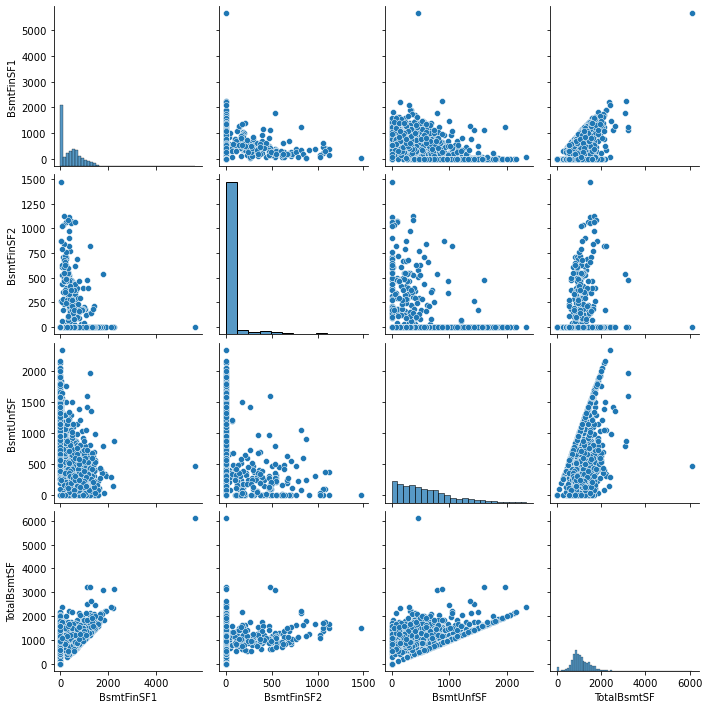

In [1599]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(house_Basement)
plt.show()

- plotting the box plots remainig basement related colums to see the effect of those features with the target varibale Sales price.

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

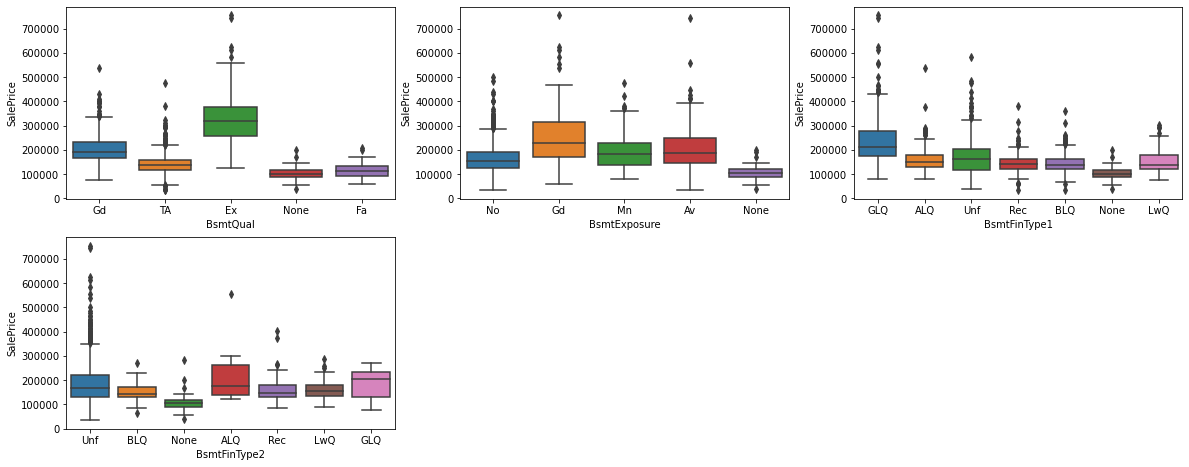

In [1600]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = train)

##### We can drop BsmtFinType2, BsmtFinType1, BsmtExposure as they dont havemuch influence on sales price.
- dropping some of the basement related columns as they dont show much influence with the target variable

In [1601]:
#drop the columns
basementcolList = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
train.drop(basementcolList, axis=1, inplace=True)
#cheking the shape of the house price data set after dropping basement variables
train.shape

(1460, 53)

In [1602]:
# imputing MasVnrArea column null values
train["MasVnrArea"] = train["MasVnrArea"].replace(np.nan, train["MasVnrArea"].median())
train["MasVnrArea"] = train["MasVnrArea"].astype('int')

In [1603]:
# checking for the remaining null values in the dataset
round(100*train.isnull().sum()[(train.isnull().sum()>0)]/len(train), 2)

MasVnrType      0.55
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageQual      5.55
dtype: float64

In [1604]:
train["FireplaceQu"] = train["FireplaceQu"].fillna(0)
train["FireplaceQu"].value_counts()


0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1605]:
train.drop("FireplaceQu", axis=1, inplace=True)
train.shape

(1460, 52)

In [1606]:
train['MasVnrType'] = train['MasVnrType'].fillna("None")
train['MasVnrType'].value_counts()/len(train['MasVnrType'])*100

None       59.726027
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

#### Analyzing Garage columns

In [1607]:
#GarageType, GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)

In [1608]:
train["GarageType"] = train["GarageType"].astype('str')
train["GarageType"] = train["GarageType"].str.replace("nan", "No Garage")
print(train["GarageType"].describe())
print(train["GarageType"].value_counts())
train['GarageType'].value_counts()/len(train['GarageType'])*100

count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64


Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [1609]:
train['GarageYrBlt'].value_counts()/len(train['GarageYrBlt'])*100

0.0       5.547945
2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
1977.0    2.397260
1998.0    2.123288
1999.0    2.054795
1976.0    1.986301
2008.0    1.986301
2000.0    1.849315
1968.0    1.780822
2002.0    1.780822
1950.0    1.643836
1993.0    1.506849
1958.0    1.438356
1966.0    1.438356
2009.0    1.438356
1965.0    1.438356
1962.0    1.438356
2001.0    1.369863
1970.0    1.369863
1996.0    1.369863
1957.0    1.369863
1954.0    1.301370
1997.0    1.301370
1978.0    1.301370
1960.0    1.301370
1995.0    1.232877
1994.0    1.232877
1974.0    1.232877
1964.0    1.232877
1959.0    1.164384
1990.0    1.095890
1963.0    1.095890
1956.0    1.095890
1967.0    1.027397
1969.0    1.027397
1979.0    1.027397
1980.0    1.027397
1988.0    0.958904
1940.0    0.958904
1920.0    0.958904
1972.0    0.958904
1973.0    0.958904
1961.0    0.890411
1971.0    0.890411
1992.0    0.890411
1955.0    0.890411
1953.0    0.821918
1948.0    0.753425
1987.0    0.

In [1610]:
print(train['GarageQual'].value_counts())
print(train['GarageQual'].describe())
train["GarageQual"] = train["GarageQual"].str.replace("nan", "No Garage")
print(train['GarageQual'].value_counts()/len(train['GarageQual'])*100)


TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64


##### it almost contains 90% of TA value in GargeQual so we can remove that column

In [1611]:
print(train["GarageFinish"].value_counts())
print(train['GarageFinish'].value_counts()/len(train['GarageFinish'])*100)

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64


#### plotting Garage related columns with the target variable Sales price

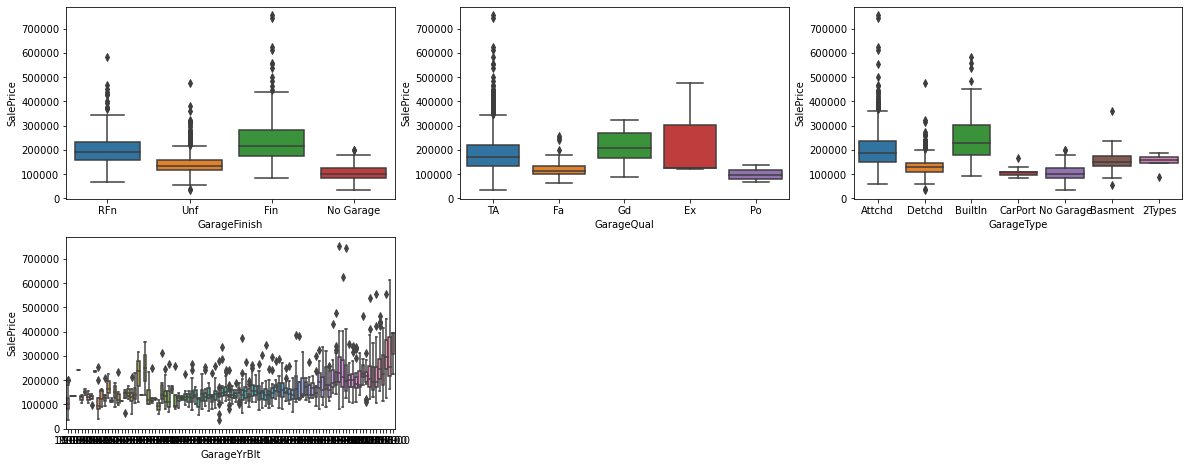

In [1612]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = train)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = train)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = train)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = train)
plt.show()

- from the plots plotted above and value_caounts calculation GarageQual, MasVnrArea are less influence varibles. So we can drop them

In [1613]:
train.drop("GarageQual", axis=1, inplace=True)
train.shape

(1460, 51)

In [1614]:
train.drop("MasVnrArea", axis=1, inplace=True)
train.shape

(1460, 50)

In [1615]:
round(100*train.isnull().sum()[(train.isnull().sum()>0)]/len(train), 2)

Series([], dtype: float64)

#### Now there is no nullable columns and rows

In [1616]:
train.shape # final shape 

(1460, 50)

In [1617]:
corrMatrix = train.corr()
corrMatrix #Inspect correlation of numerical variables against the target variable(Sale Price)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt     -0.080997     0.099196  0.072599     0.288998    -0.006515   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  \
MSSubClass      0.027850      0.040581    -0.238518 -0.251758  0.307886  ...   
LotFrontage     0.116685      0.083348     0.363472  0.413773  0.072388  ...   
LotArea         0.014228      0.013788     0.260833  0.299475  0.050986  ...   
OverallQual     0.572323      0.550684     0.537808  0.476224  0.295493  ...   
OverallCond    -0.375983      0.073741    -0.171098 -0.144203  0.028942  ...   
YearBuilt       1.000000      0.592855     0.391452  0.281986  0.010308  ...   
YearRemodAdd    0.592855      1.000000     0.291066  0.240379  0.140024  ...   
TotalBsmtSF     0.391452      0.291066     1.000000  0.819530 -0.174512  ...   
1stFlrSF        0.281986      0.240379     0.819530  1.000000 -0.202646  ...   
2ndFlrSF        0.010308      0.140024    -0.174512 -0.202646  1.000000  ...   
GrLivArea       0.199010      0.287389     0.454868  0.566024  0.687501  ...   
BsmtFullBath    0.187599      0.119470     0.307351  0.244671 -0.169494  ...   
FullBath        0.468271      0.439046     0.323722  0.380637  0.421378  ...   
HalfBath        0.242656      0.183331    -0.048804 -0.119916  0.609707  ...   
BedroomAbvGr   -0.070651     -0.040581     0.050450  0.127401  0.502901  ...   
TotRmsAbvGrd    0.095589      0.191740     0.285573  0.409516  0.616423  ...   
Fireplaces      0.147716      0.112581     0.339519  0.410531  0.194561  ...   
GarageYrBlt     0.272029      0.146357     0.176359  0.166642  0.064402  ...   
GarageCars      0.537850      0.420622     0.434585  0.439317  0.183926  ...   
GarageArea      0.478954      0.371600     0.486665  0.489782  0.138347  ...   
WoodDeckSF      0.224880      0.205726     0.232019  0.235459  0.092165  ...   
OpenPorchSF     0.188686      0.226298     0.247264  0.211671  0.208026  ...   
EnclosedPorch  -0.387268     -0.193919    -0.095478 -0.065292  0.061

In [1618]:
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

<AxesSubplot:>

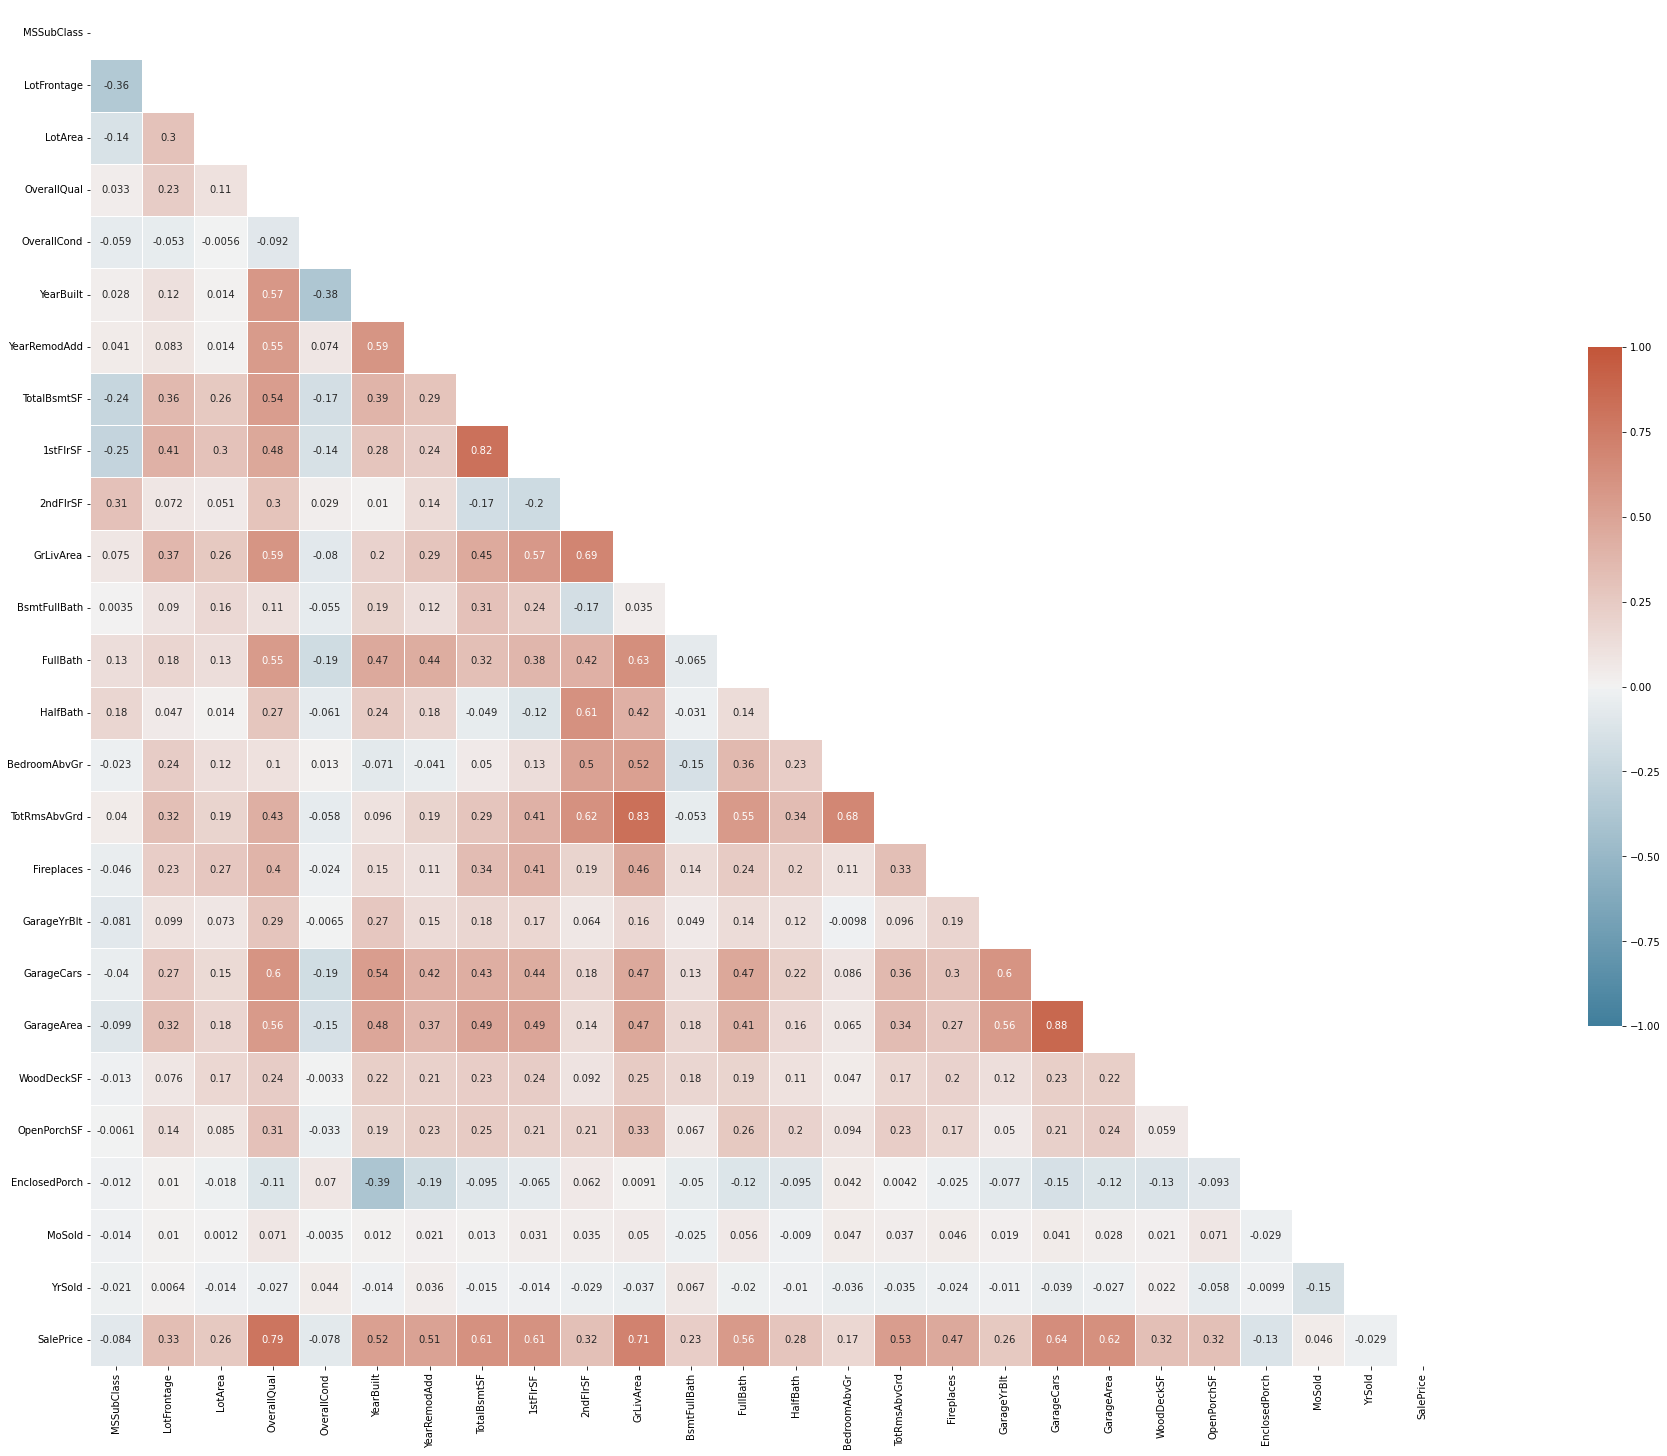

In [1619]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix, vmin=-1, vmax=1, mask=mask, cmap=cmap,  center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, 'orientation': 'vertical'})

In [1620]:
corrMatrix['SalePrice'].sort_values(ascending = False)
#Highest correlated variables

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BedroomAbvGr     0.168213
MoSold           0.046432
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

- Highest correlation of house :OverallQual,GrLivArea,GarageCars,GarageArea ,TotalBsmtSF,1stFlrSF , FullBath      

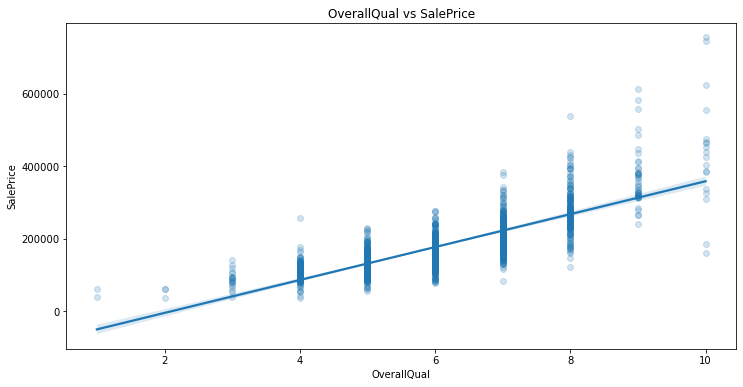

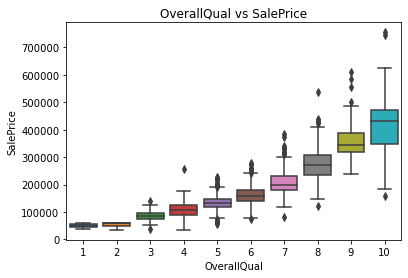

In [1621]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'OverallQual', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('OverallQual vs SalePrice', fontsize = 12)

plt.show()
sns.boxplot(data=train, x = 'OverallQual', y='SalePrice')
plt.title('OverallQual vs SalePrice', fontsize = 12)

plt.show()

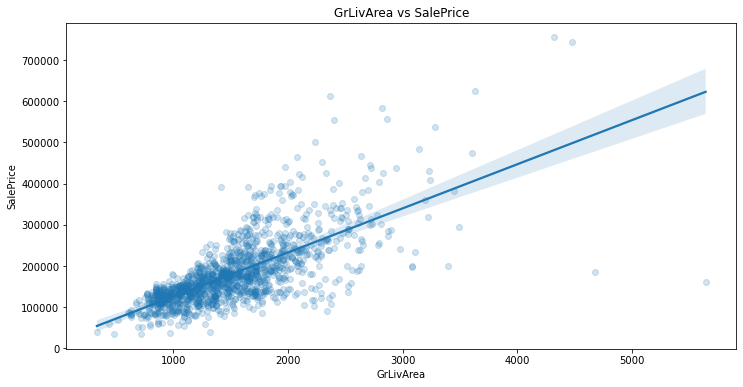

In [1622]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)

plt.show()

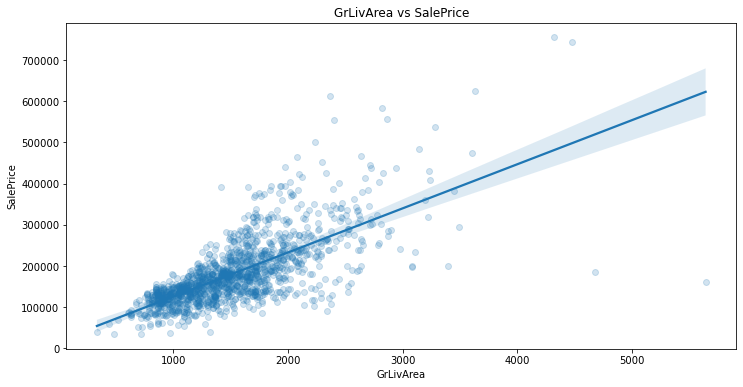

In [1623]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)

plt.show()

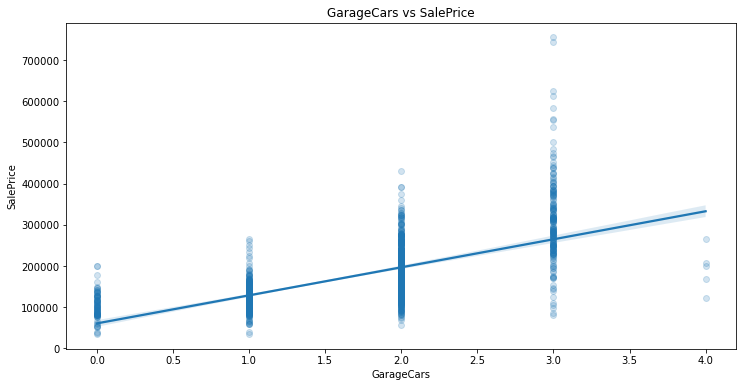

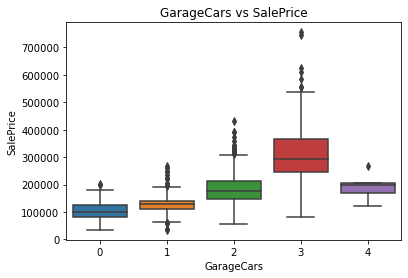

In [1624]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GarageCars', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageCars vs SalePrice', fontsize = 12)

plt.show()
sns.boxplot(data=train, x = 'GarageCars', y='SalePrice')
plt.title('GarageCars vs SalePrice', fontsize = 12)
plt.show()

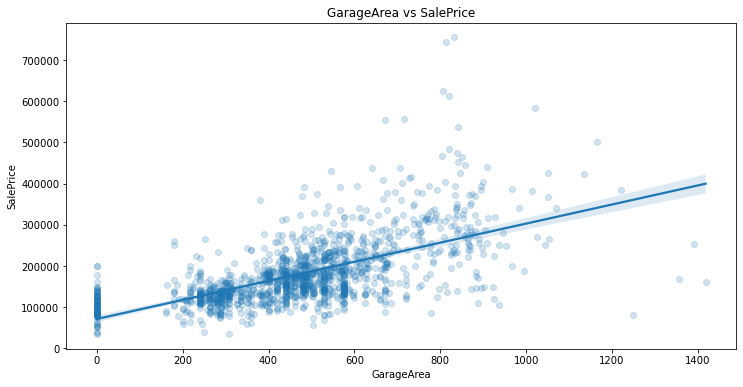

In [1625]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GarageArea vs SalePrice', fontsize = 12)

plt.show()

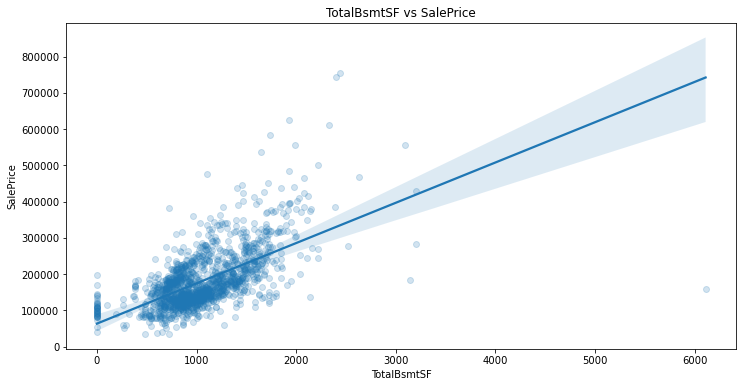

In [1626]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)

plt.show()

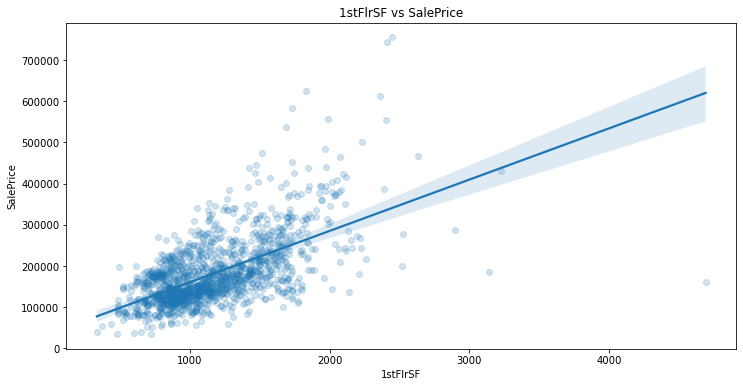

In [1627]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = '1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('1stFlrSF vs SalePrice', fontsize = 12)

plt.show()

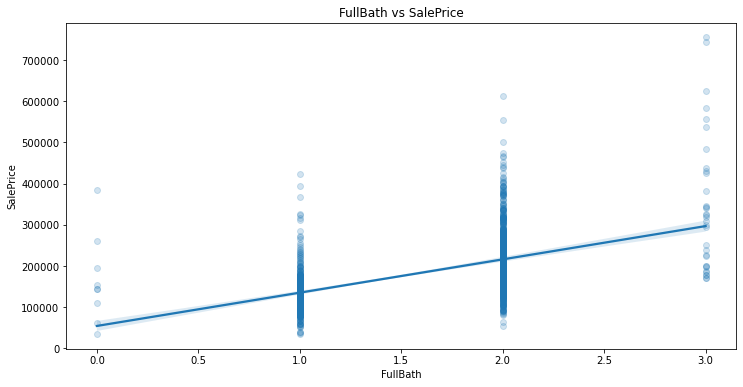

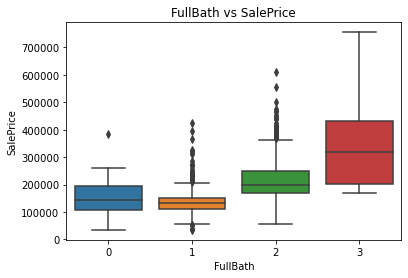

In [1628]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'FullBath', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('FullBath vs SalePrice', fontsize = 12)

plt.show()
sns.boxplot(data=train, x = 'FullBath', y='SalePrice')
plt.title('FullBath vs SalePrice', fontsize = 12)
plt.show()


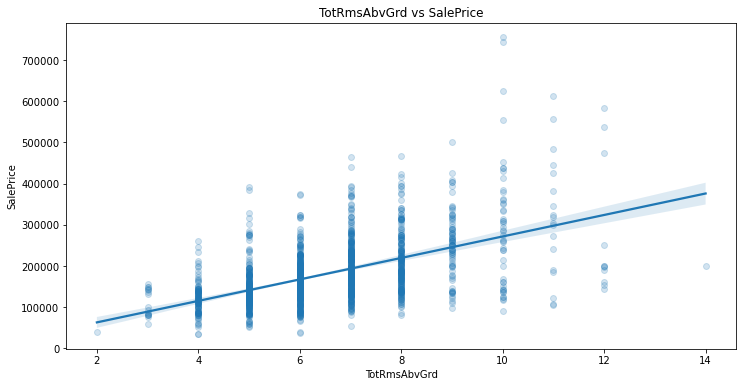

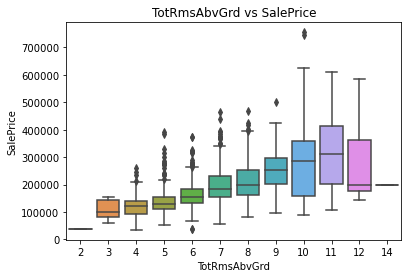

In [1629]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotRmsAbvGrd vs SalePrice', fontsize = 12)

plt.show()
sns.boxplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice')
plt.title('TotRmsAbvGrd vs SalePrice', fontsize = 12)
plt.show()

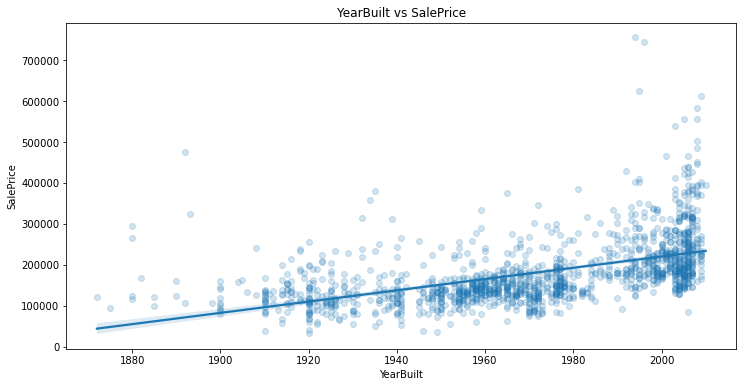

In [1630]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)

plt.show()

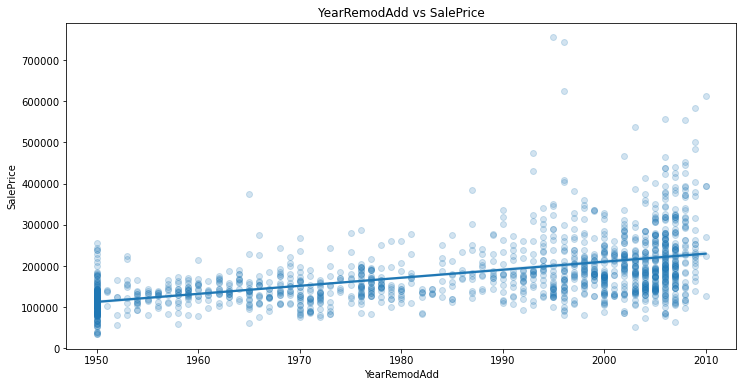

In [1631]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'YearRemodAdd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearRemodAdd vs SalePrice', fontsize = 12)

plt.show()

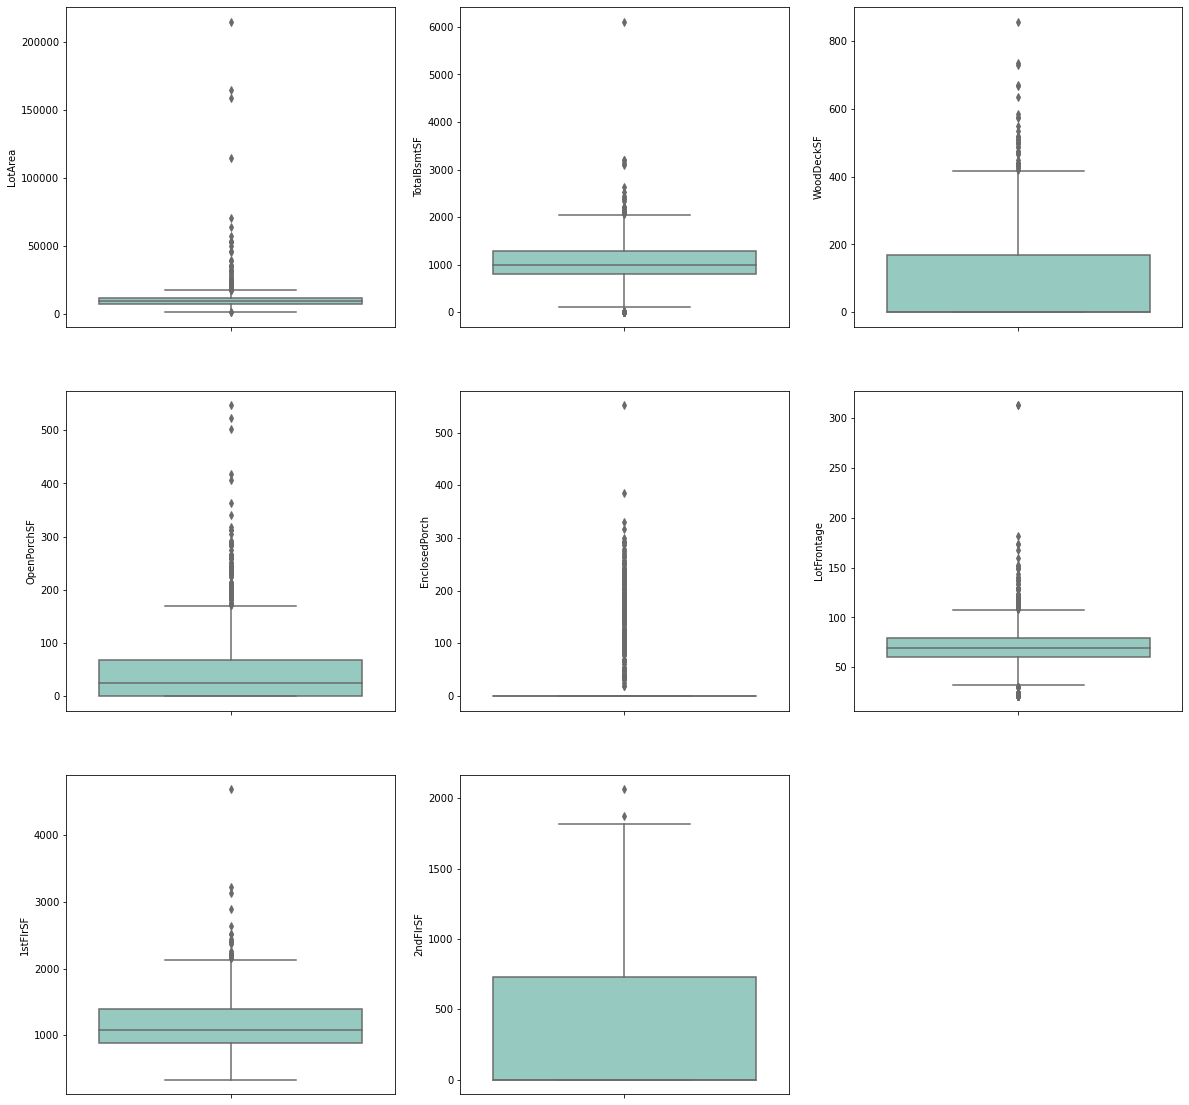

In [1632]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = train)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = train)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = train)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = train)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = train)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = train)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = train)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = train)

plt.show()

In [1633]:
# Removing Outliers

# Removing values beyond 99% for LotArea
train = train[train["LotArea"] < train['LotArea'].quantile(0.99)]

# Removing values beyond 99% for TotalBsmtSF
train = train[train["TotalBsmtSF"] < train['TotalBsmtSF'].quantile(0.99)]


# Removing values beyond 99% for WoodDeckSF
train = train[train["WoodDeckSF"] < train['WoodDeckSF'].quantile(0.99)]


# Removing values beyond 99% for OpenPorchSF
train = train[train["OpenPorchSF"] < train['OpenPorchSF'].quantile(0.99)]

# Removing values beyond 99% for OpenPorchSF
train = train[train["EnclosedPorch"] < train['EnclosedPorch'].quantile(0.99)]

In [1634]:
train.shape

(1386, 50)

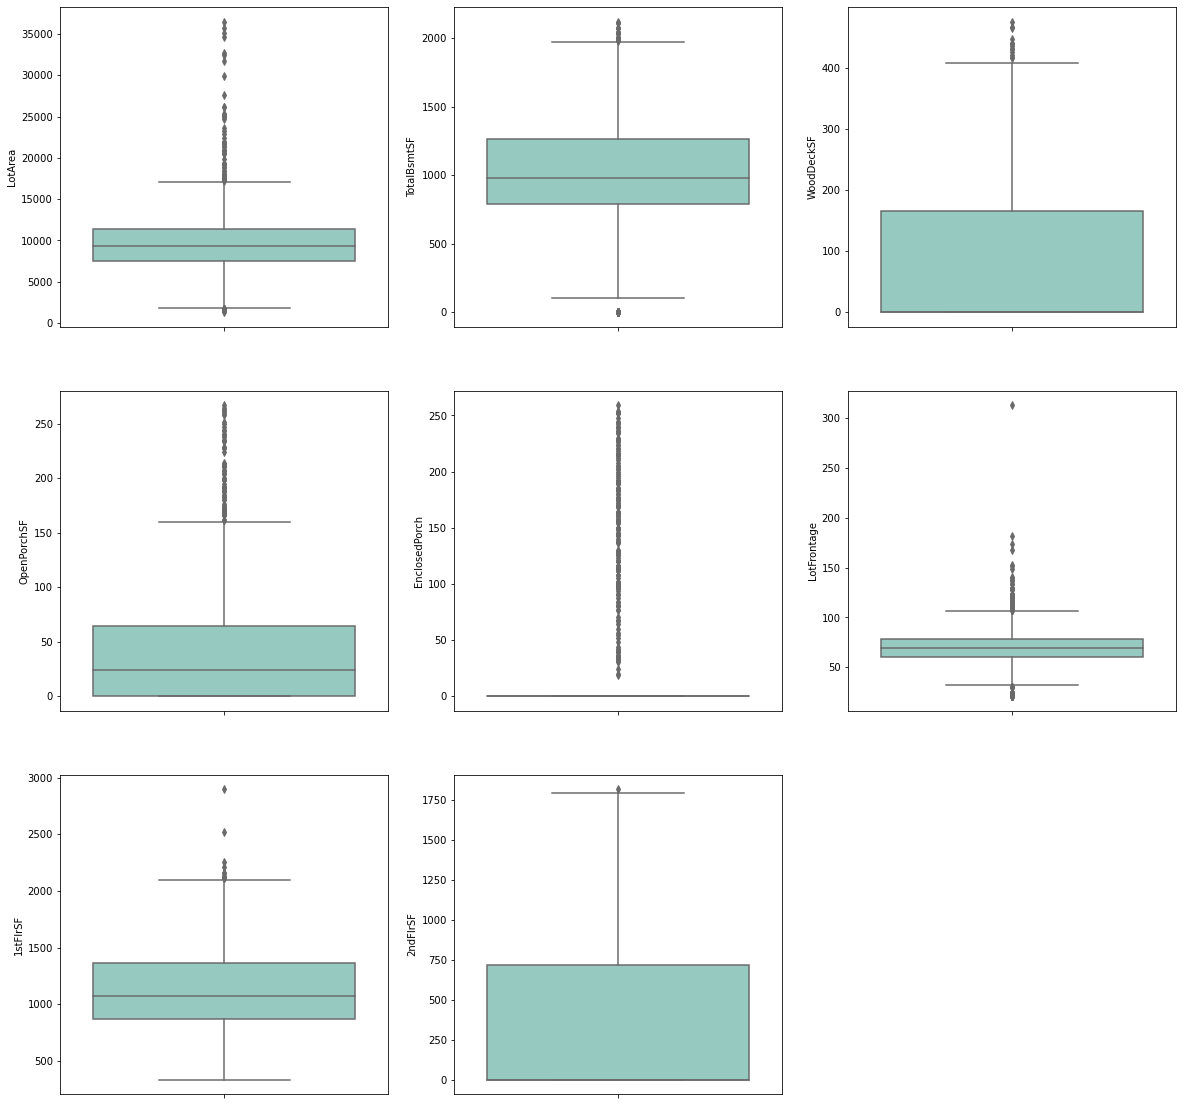

In [1635]:
# checking for the outliers in all the numeric columns
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y="LotArea",palette='Set3', data = train)
plt.subplot(3,3,2)
sns.boxplot(y="TotalBsmtSF",palette='Set3', data = train)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = train)
plt.subplot(3,3,4)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = train)
plt.subplot(3,3,5)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = train)
plt.subplot(3,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = train)
plt.subplot(3,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = train)
plt.subplot(3,3,8)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = train)

plt.show()


In [1636]:
# Determine the percentage of data retained after removing the outliers
num_data = round(100*(len(train)/1460),2)
print(num_data)

94.93


# 4.Data Visualization

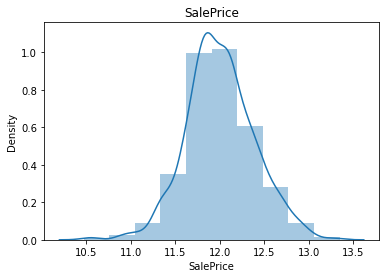

In [1637]:
# transform the sales price
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.title('SalePrice')
sns.distplot(train['SalePrice'], bins=10)
plt.show()

In [1638]:
# Check the numerical values using pairplots

houseNum1=train[['LotFrontage','LotArea','MSSubClass','OverallQual', 'OverallCond','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'GrLivArea',
                  'SalePrice']]

houseNum2=train[['BsmtFullBath','FullBath', 'HalfBath','BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea', 'WoodDeckSF',               
'OpenPorchSF','SalePrice']]

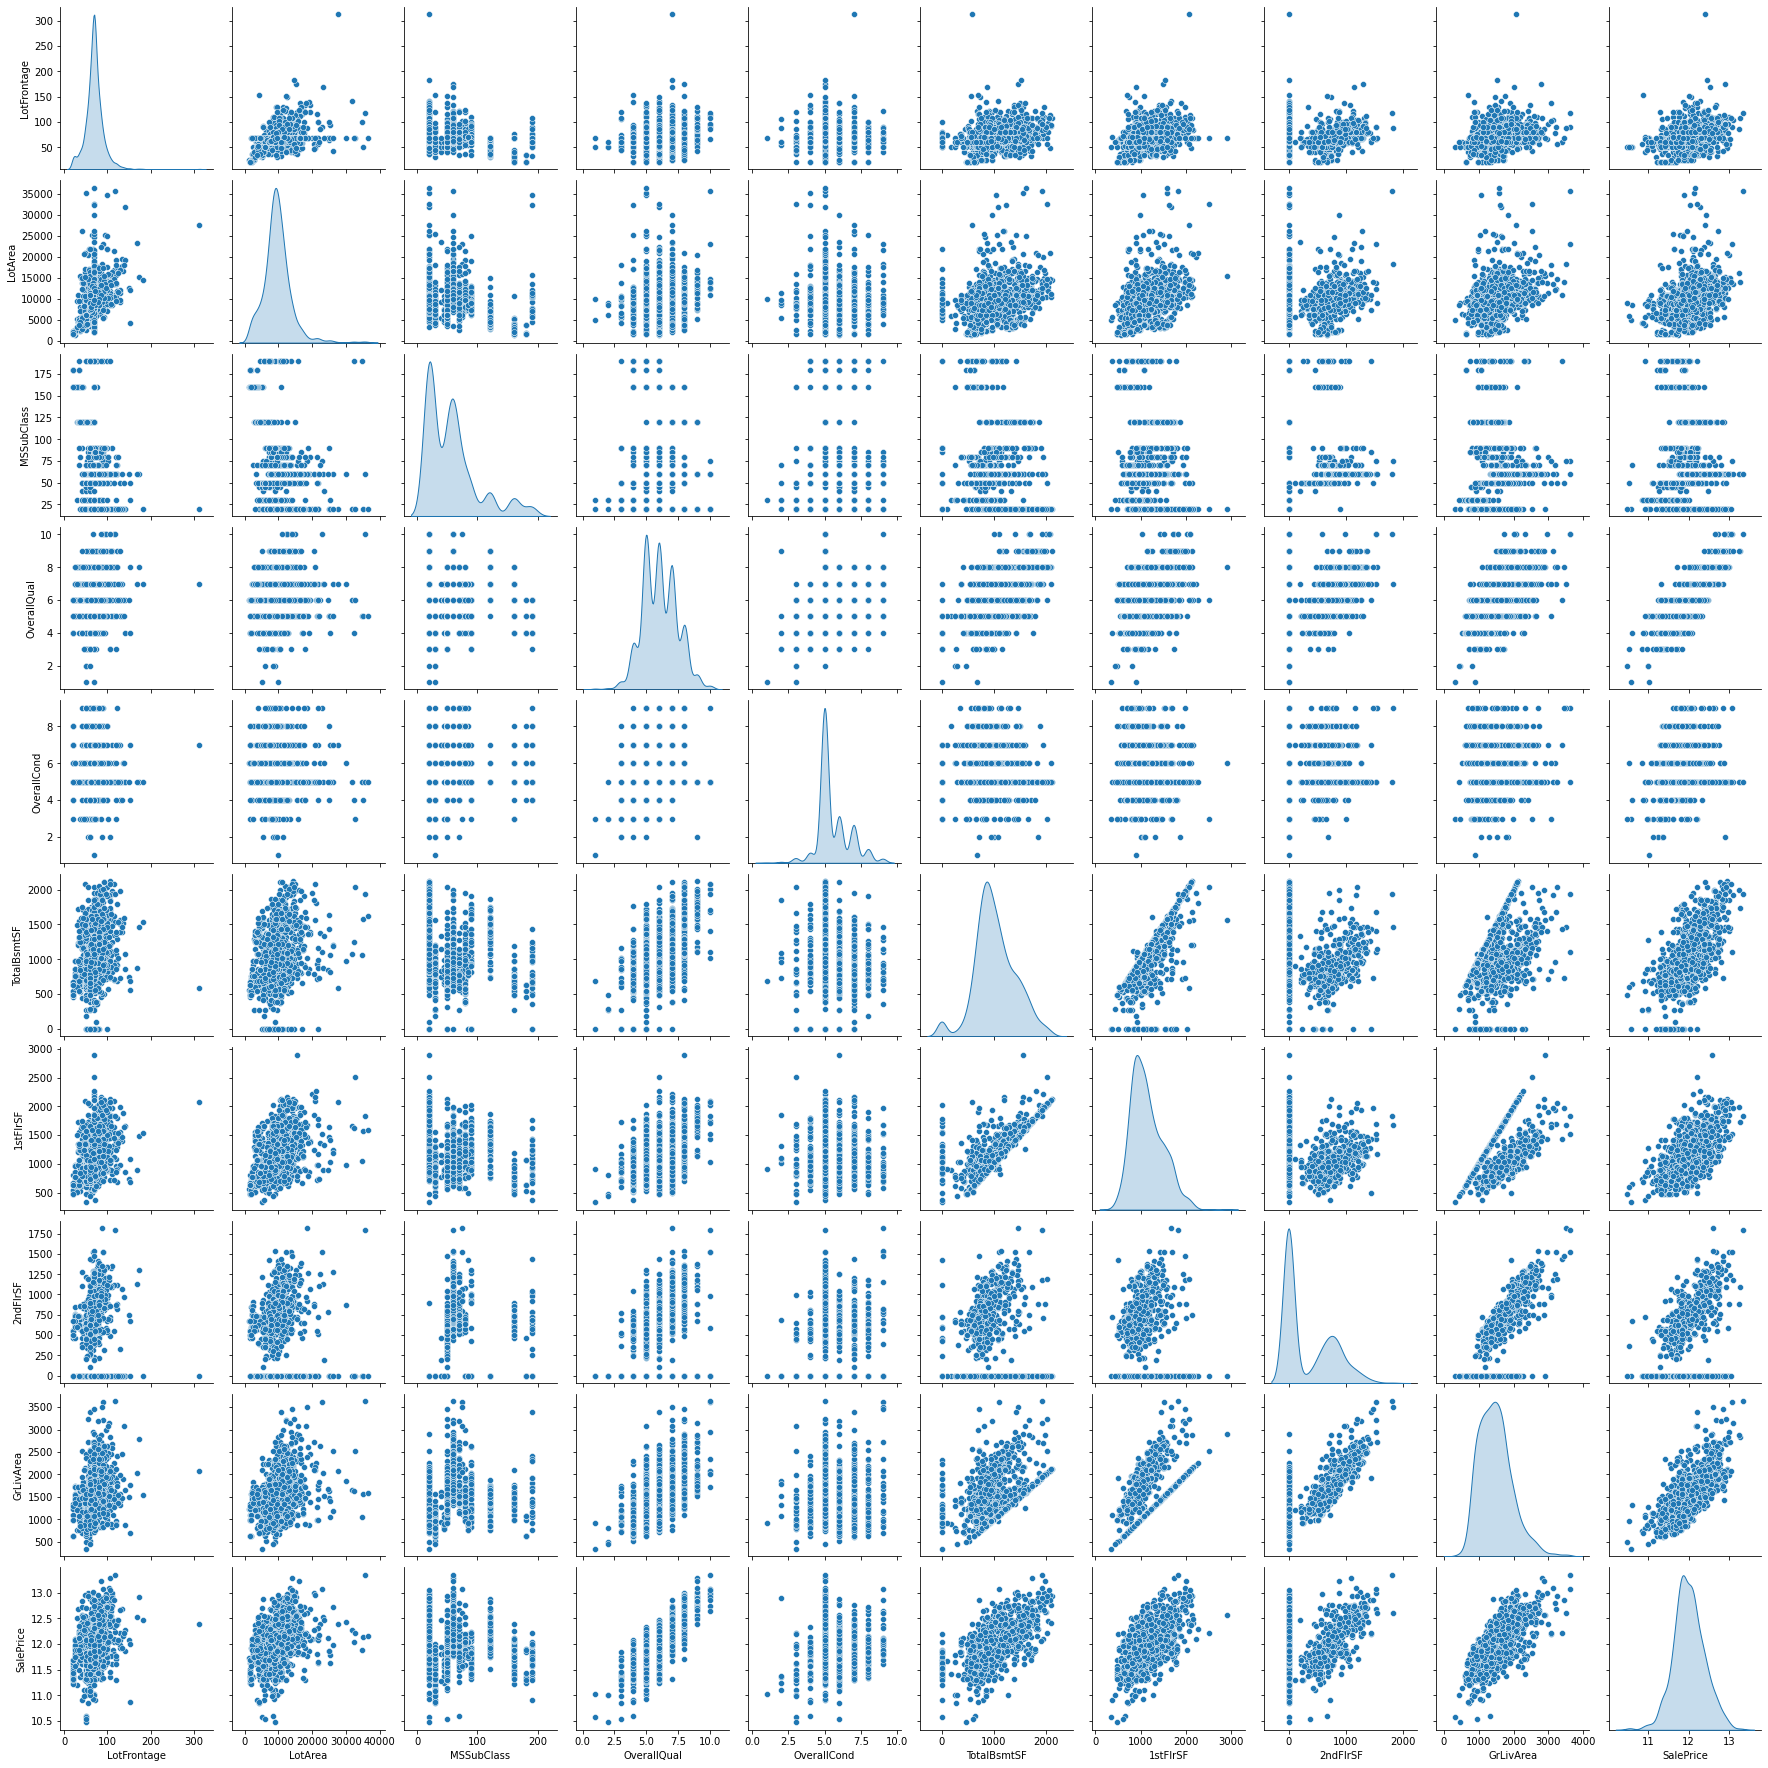

In [1639]:
sns.pairplot(houseNum1, diag_kind='kde')
plt.show()

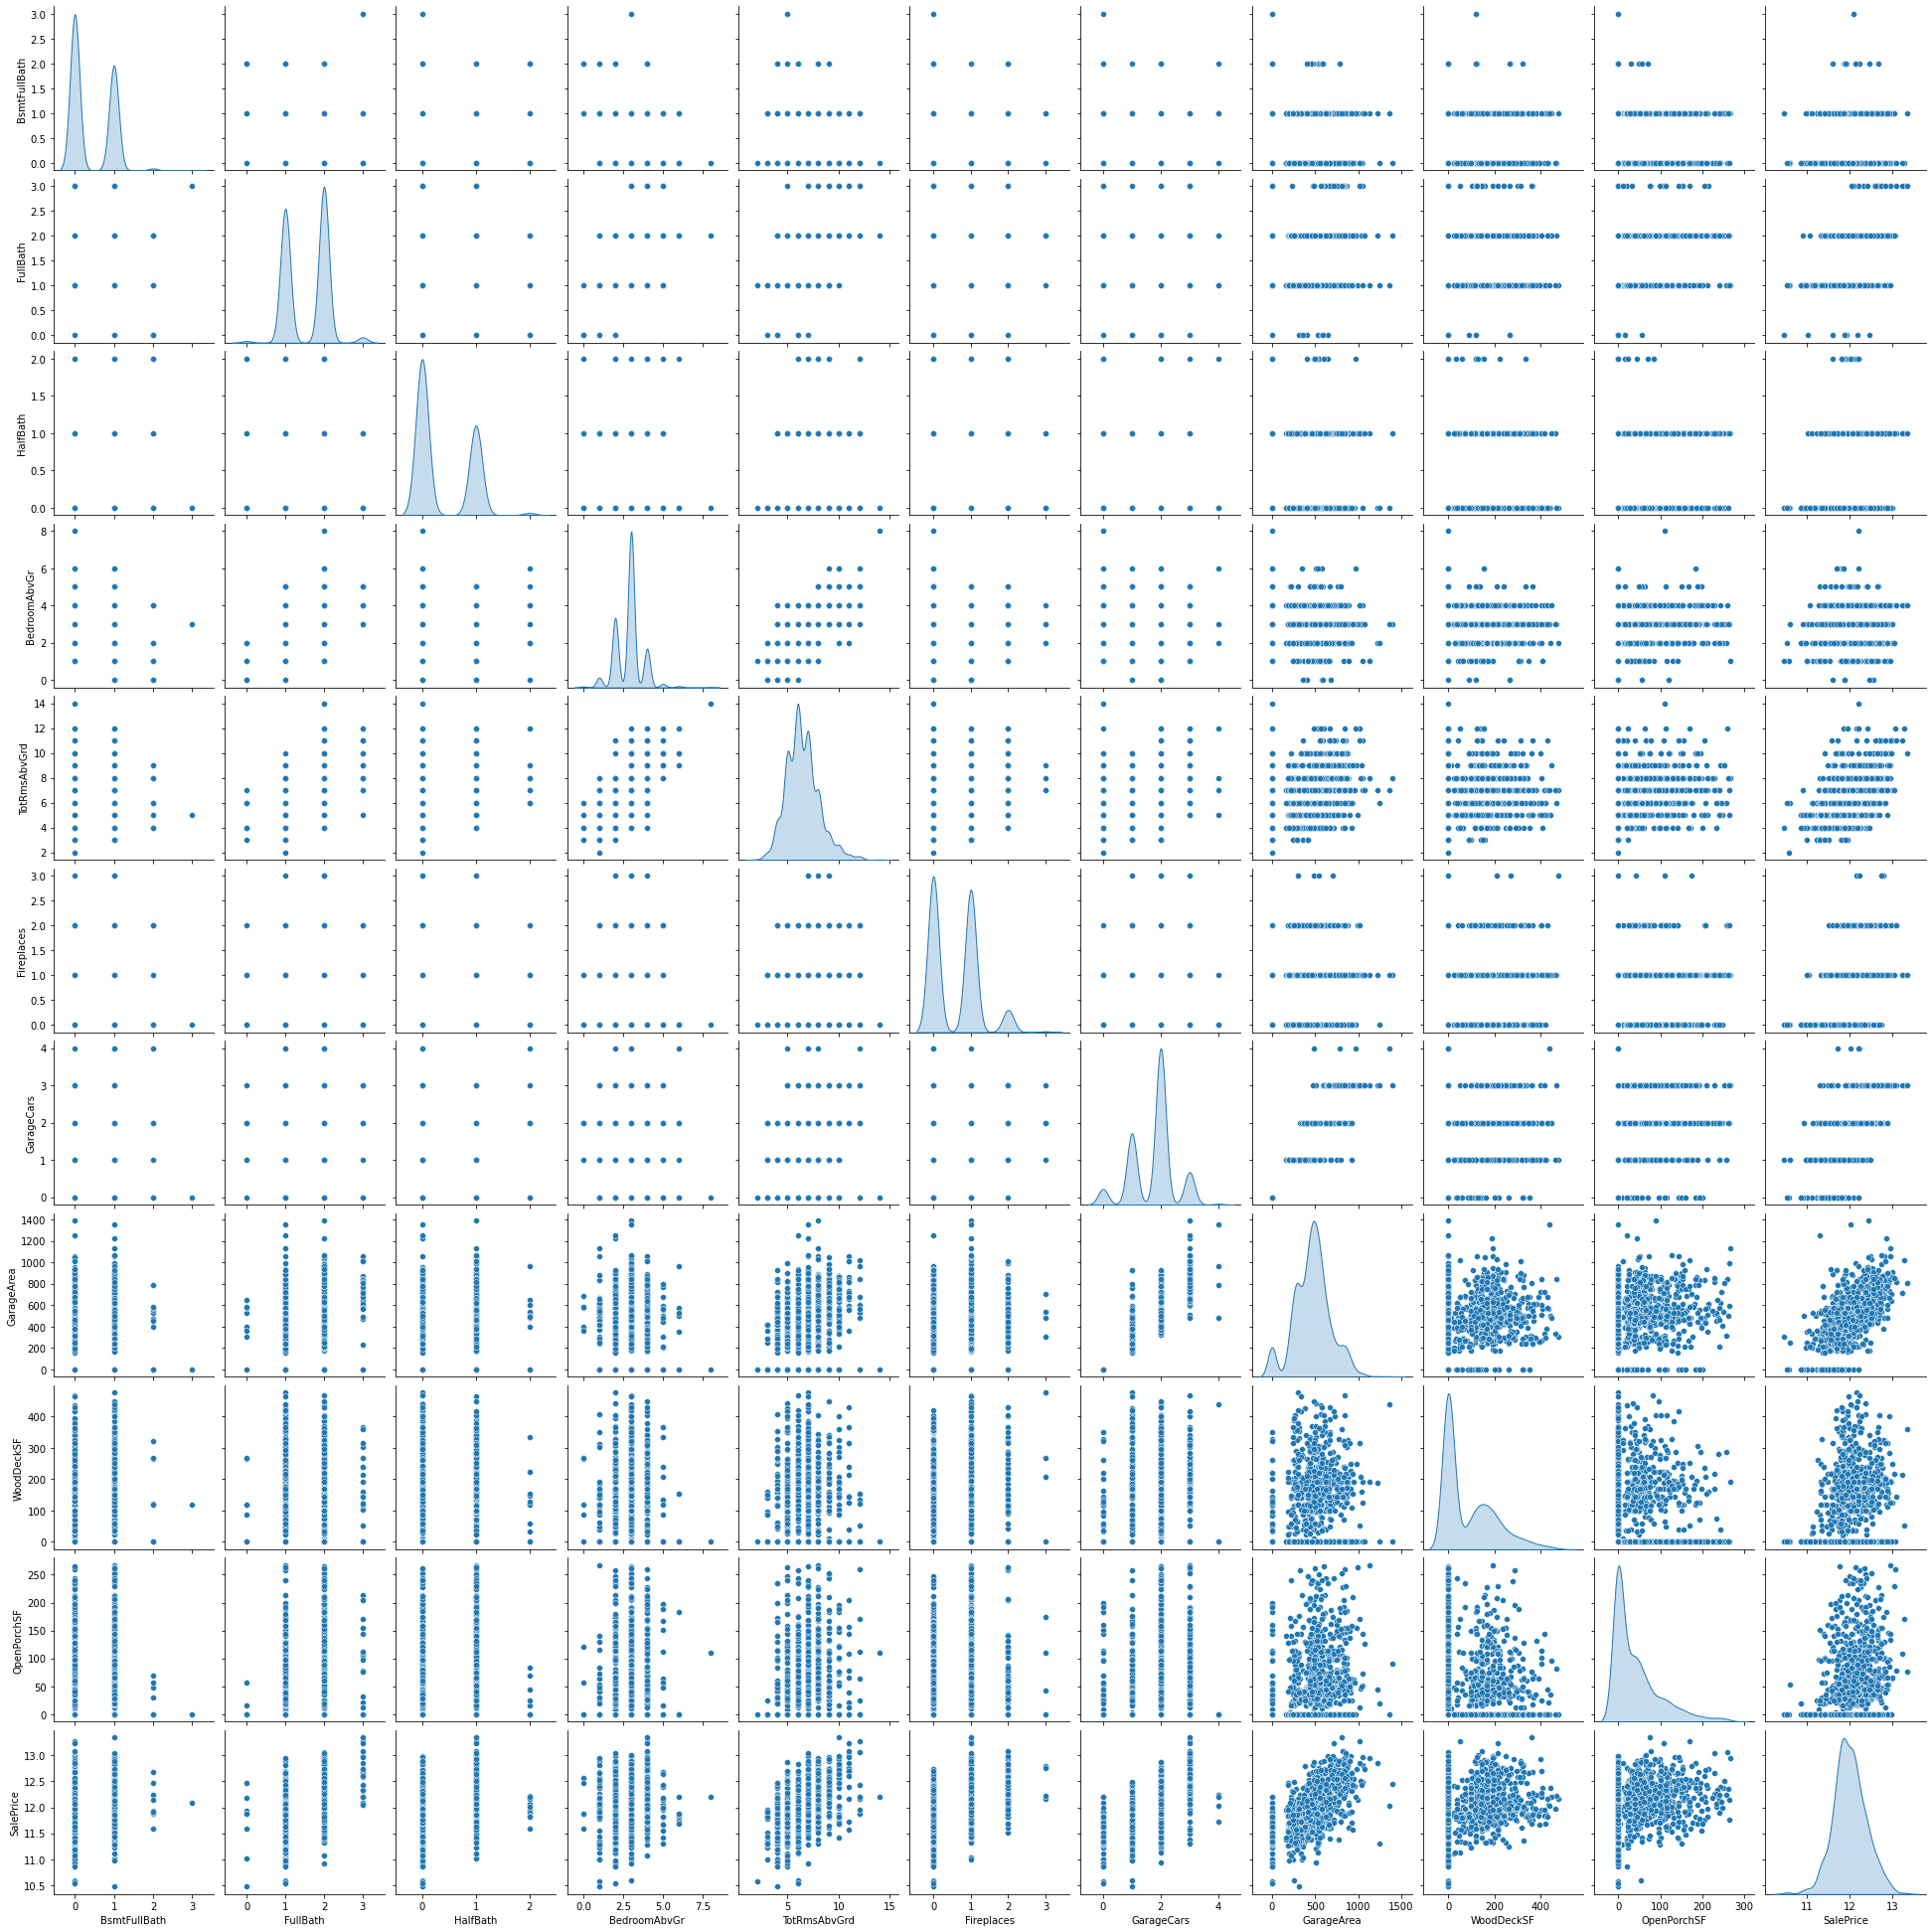

In [1640]:
sns.pairplot(houseNum2, diag_kind='kde')
plt.show()

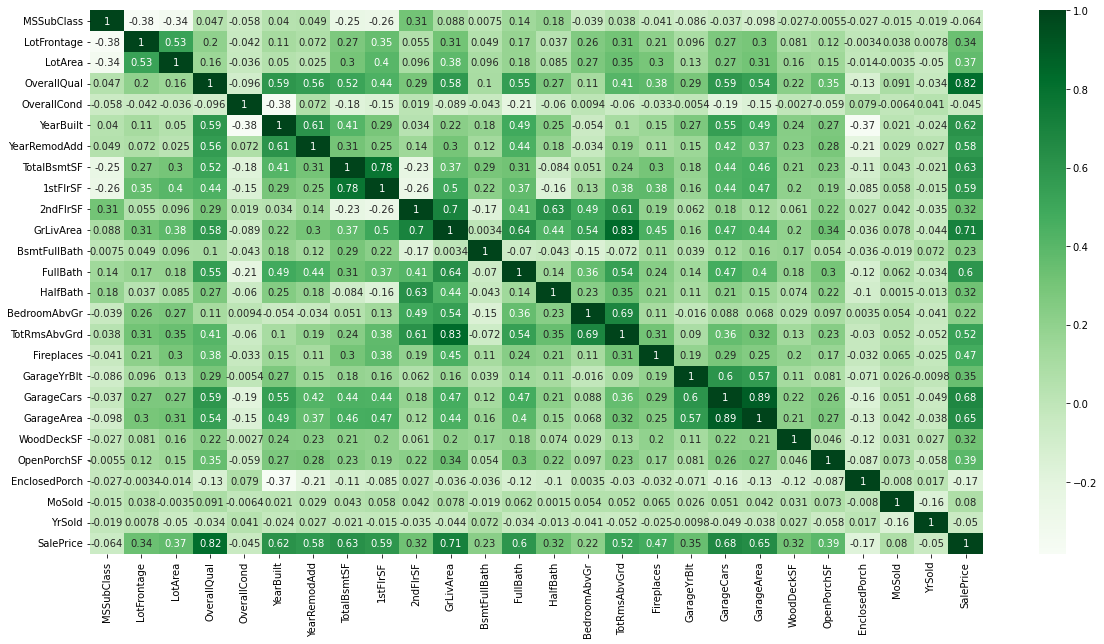

In [1641]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="Greens")
plt.show()

Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

In [1642]:
# Removing the highly correlated variables

train.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [1643]:
### newly derived columns

In [1644]:
train[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
4       2000          2000       2000.0    2008
5       1993          1995       1993.0    2009

In [1645]:
# Create a new column named IsRemodelled - This column can determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
train['IsRemodelled'] = train.apply(checkRemodel, axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... WoodDeckSF  OpenPorchSF  \
0      CollgCr       Norm     1Fam  ...          0           61   
1      Veenker      Feedr     1Fam  ...        298            0   
2      CollgCr       Norm     1Fam  ...          0           42   
4      NoRidge       Norm     1Fam  ...        192           84   
5      Mitchel       Norm     1Fam  ...         40           30   

   EnclosedPorch     Fence  MoSold YrSold SaleType SaleCondition  SalePrice  \
0              0  No Fence       2   2008       WD        Normal  12.247699   
1              0  No Fence       5   2007       WD        Normal  12.109016   
2              0  No Fence       9   2008       WD        Normal  12.317171   
4              0  No Fence      12   2008       WD        Normal  12.429220   
5              0     MnPrv      10   2009       WD        Normal  11.870607   

  IsRemodelled  
0            0  
1            0  
2            1  
4            0  
5            1  

[5 rows x 49 columns]

In [1646]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
train['BuiltOrRemodelAge'] = train.apply(funBuiltOrRemodelAge, axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... OpenPorchSF  EnclosedPorch     Fence  \
0      CollgCr       Norm     1Fam  ...          61              0  No Fence   
1      Veenker      Feedr     1Fam  ...           0              0  No Fence   
2      CollgCr       Norm     1Fam  ...          42              0  No Fence   
4      NoRidge       Norm     1Fam  ...          84              0  No Fence   
5      Mitchel       Norm     1Fam  ...          30              0     MnPrv   

   MoSold  YrSold SaleType SaleCondition  SalePrice IsRemodelled  \
0       2    2008       WD        Normal  12.247699            0   
1       5    2007       WD        Normal  12.109016            0   
2       9    2008       WD        Normal  12.317171            1   
4      12    2008       WD        Normal  12.429220            0   
5      10    2009       WD        Normal  11.870607            1   

  BuiltOrRemodelAge  
0                 5  
1                31  
2                 6  
4                 8  
5                14  

[5 rows x 50 columns]

In [1647]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def GarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
train['OldOrNewGarage'] = train['GarageYrBlt'].apply(GarageConstructionPeriod)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
4          60       RL         84.0    14260      IR1         Lvl       FR2   
5          50       RL         85.0    14115      IR1         Lvl    Inside   

  Neighborhood Condition1 BldgType  ... EnclosedPorch     Fence  MoSold  \
0      CollgCr       Norm     1Fam  ...             0  No Fence       2   
1      Veenker      Feedr     1Fam  ...             0  No Fence       5   
2      CollgCr       Norm     1Fam  ...             0  No Fence       9   
4      NoRidge       Norm     1Fam  ...             0  No Fence      12   
5      Mitchel       Norm     1Fam  ...             0     MnPrv      10   

   YrSold  SaleType SaleCondition  SalePrice IsRemodelled BuiltOrRemodelAge  \
0    2008        WD        Normal  12.247699            0                 5   
1    2007        WD        Normal  12.109016            0                31   
2    2008        WD        Normal  12.317171            1                 6   
4    2008        WD        Normal  12.429220            0                 8   
5    2009        WD        Normal  11.870607            1                14   

  OldOrNewGarage  
0              1  
1              0  
2              1  
4              1  
5              0  

[5 rows x 51 columns]

In [1648]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# we can use the derived columns for further analysis

train.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [1649]:
train[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0        Gd       Gd       TA        Ex          Gd          RFn        TA   
1        TA       Gd       TA        Ex          TA          RFn        TA   
2        Gd       Gd       TA        Ex          Gd          RFn        TA   
4        Gd       Gd       TA        Ex          Gd          RFn        TA   
5        TA       Gd       TA        Ex          TA          Unf        TA   

  LotShape  
0      Reg  
1      Reg  
2      IR1  
4      IR1  
5      IR1

##### Chaging the type to category and labeling the values:

In [1650]:
train['ExterQual'] = train['ExterQual'].astype('category')
train['BsmtQual'] = train['BsmtQual'].astype('category')
train['BsmtCond'] = train['BsmtCond'].astype('category')
train['HeatingQC'] = train['HeatingQC'].astype('category')
train['KitchenQual'] = train['KitchenQual'].astype('category')
train['GarageFinish'] = train['GarageFinish'].astype('category')
# train['GarageQual'] = train['GarageQual'].astype('category')
train['ExterCond'] = train['ExterCond'].astype('category')
train['LotShape'] = train['LotShape'].astype('category')
train['Neighborhood'] = train['Neighborhood'].astype('category')

In [1651]:
train['ExterQual'] = train.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['BsmtQual'] = train.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtCond'] = train.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['HeatingQC'] = train.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['KitchenQual'] = train.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# train['FireplaceQu'] = train['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train['GarageFinish'] = train.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
# train['GarageQual'] = train.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['ExterCond'] = train.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['LotShape'] = train.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
train['Fence'] = train['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })



In [1652]:
#columns change to numerical
train[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head() #,'GarageQual',

ExterQual BsmtQual BsmtCond HeatingQC KitchenQual GarageFinish ExterCond  \
0         3        4        3         4           3            2         2   
1         2        4        3         4           2            2         2   
2         3        4        3         4           3            2         2   
4         3        4        3         4           3            2         2   
5         2        4        3         4           2            1         2   

  LotShape  
0        3  
1        3  
2        0  
4        0  
5        0

In [1653]:
# categorical columns
train[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

MSZoning LandContour LotConfig Condition1 BldgType HouseStyle RoofStyle  \
0       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
1       RL         Lvl       FR2      Feedr     1Fam     1Story     Gable   
2       RL         Lvl    Inside       Norm     1Fam     2Story     Gable   
4       RL         Lvl       FR2       Norm     1Fam     2Story     Gable   
5       RL         Lvl    Inside       Norm     1Fam     1.5Fin     Gable   

  Exterior1st Exterior2nd MasVnrType Foundation Neighborhood GarageType  \
0     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
1     MetalSd     MetalSd       None     CBlock      Veenker     Attchd   
2     VinylSd     VinylSd    BrkFace      PConc      CollgCr     Attchd   
4     VinylSd     VinylSd    BrkFace      PConc      NoRidge     Attchd   
5     VinylSd     VinylSd       None       Wood      Mitchel     Attchd   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
4       WD        Normal  
5       WD        Normal

In [1654]:
#neighbpurhood column
train["Neighborhood"].value_counts()
train.shape

(1386, 47)

In [1655]:
houseDummy = pd.get_dummies(train[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [1656]:
houseNew = pd.concat([train, houseDummy], axis='columns')

In [1657]:
print(houseNew.shape)
# dropping the actual variables after getting the dummys
houseNew = houseNew.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
print(houseNew.shape)

(1386, 162)
(1386, 147)


In [1658]:
houseNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 147 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(22), uint8(115)
memory usage: 471.1 KB


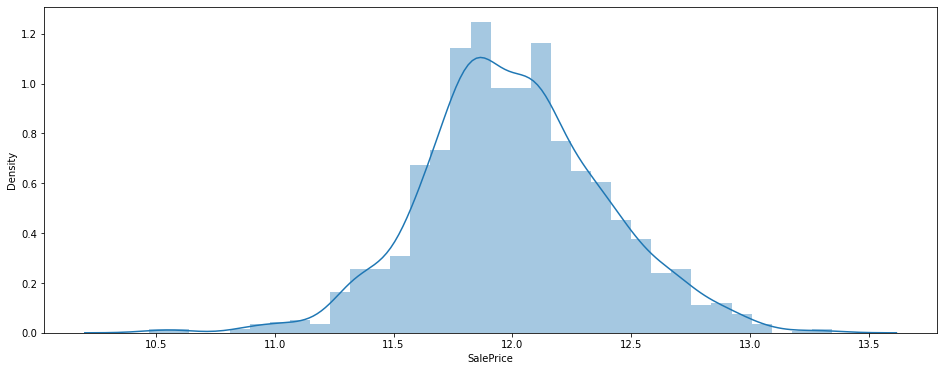

In [1659]:
#lets plot the distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(houseNew.SalePrice)
plt.show()

In [1660]:
# Finally check the values are correct or not.
houseNew.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
LotShape                 0
OverallQual              0
OverallCond              0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
GrLivArea                0
BsmtFullBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenQual              0
Fireplaces               0
GarageFinish             0
GarageCars               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
Fence                    0
MoSold                   0
SalePrice                0
IsRemodelled             0
BuiltOrRemodelAge        0
OldOrNewGarage           0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
LandContour_HLS          0
L

# 5.Model building and evaluation

## Creating train and test dataset for validation purpose
# split the data into two parts 
 - 1. Train data
 - 2. test data

In [1661]:
import re
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn import pipeline
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

In [1662]:
house_train, house_test = train_test_split(houseNew, train_size=0.7,test_size = 0.3, random_state=100)

In [1663]:
print(house_train.shape)
print(house_train.info())
print(house_test.shape)
print(house_test.info())

(970, 147)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 952 to 835
Columns: 147 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(22), uint8(115)
memory usage: 307.6 KB
None
(416, 147)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 684 to 497
Columns: 147 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(22), uint8(115)
memory usage: 132.8 KB
None


In [1664]:
houseNew[['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]]#  'SalePrice'

MSSubClass  LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  \
0             60     8450            7            5          856       856   
1             20     9600            6            8         1262      1262   
2             60    11250            7            5          920       920   
4             60    14260            8            5         1145      1145   
5             50    14115            5            5          796       796   
6             20    10084            8            5         1686      1694   
7             60    10382            7            6         1107      1107   
8             50     6120            7            5          952      1022   
9            190     7420            5            6          991      1077   
10            20    11200            5            5         1040      1040   
11            60    11924            9            5         1175      1182   
12            20    12968            5            6          912       912   
13            20    10652            7            5         1494      1494   
14            20    10920            6            5         1253      1253   
15            45     6120            7            8          832       854   
16            20    11241            6            7         1004      1004   
17            90    10791            4            5            0      1296   
18            20    13695            5            5         1114      1114   
19            20     7560            5            6         1029      1339   
20            60    14215            8            5         1158      1158   
21            45     7449            7            7          637      1108   
22            20     9742            8            5         1777      1795   
23           120     4224            5            7         1040      1060   
24            20     8246            5            8         1060      1060   
25            20    14230            8            5         1566      1600   
26            20     7200            5            7          900       900   
27            20    11478            8            5         1704      1704   
28            20    16321            5            6         1484      1600   
29            30     6324            4            6          520       520   
30            70     8500            4            4          649       649   
31            20     8544            5            6         1228      1228   
32            20    11049            8            5         1234      1234   
33            20    10552            5            5         1398      1700   
34           120     7313            9            5         1561      1561   
35            60    13418            8            5         1117      1132   
36            20    10859            5            5         1097      1097   
37            20     8532            5            6         1297      1297   
38            20     7922            5            7         1057      1057   
39            90     6040            4            5            0      1152   
40            20     8658            6            5         1088      1324   
41            20    16905            5            6         1350      1328   
42            85     9180            5            7          840       884   
43            20     9200            5            6          938       938   
44            20     7945            5            6         1150      1150   
45           120     7658            9            5         1752      1752   
46            50    12822            7            5         1434      1518   
47            20    11096            8            5         1656      1656   
48           190     4456            4            5          736       736   
49            20     7742            5            7          955       955   
50            60    13869            6            6          794       794   
51            50     6240   

In [1665]:
# scaling the train data set
from sklearn.preprocessing import StandardScaler,MinMaxScaler
num_col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
house_train[num_col] = scaler.fit_transform(house_train[num_col])
house_test[num_col] = scaler.transform(house_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

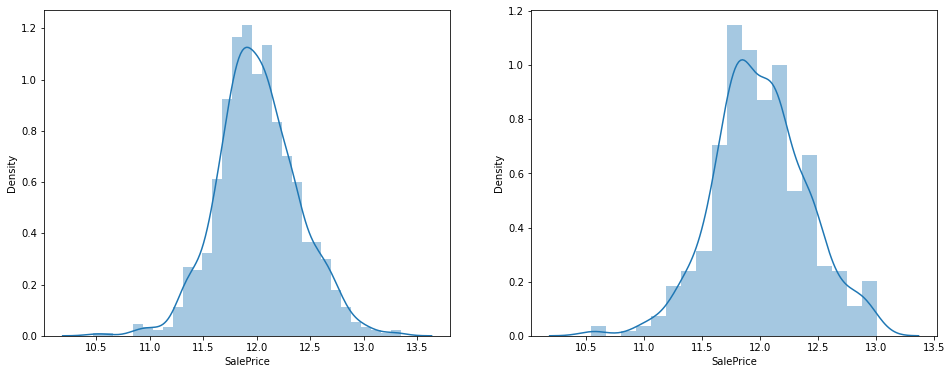

In [1666]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_train.SalePrice)
plt.subplot(122)
sns.distplot(house_test.SalePrice)

In [1667]:
X_train = house_train
y_train = house_train.pop('SalePrice')

X_test = house_test
y_test = house_test.pop('SalePrice')


In [1668]:
print(X.shape)
print(X_train.info())

(1403, 62)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 952 to 835
Columns: 146 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(18), int64(5), uint8(115)
memory usage: 300.0 KB
None


In [1669]:
print(X.shape)
print(X_test.info())

(1403, 62)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 684 to 497
Columns: 146 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(18), int64(5), uint8(115)
memory usage: 129.6 KB
None


# Linear Regression
## RFE
- since there are 148 features we will use RFE to get best 50 of them

In [1670]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [1671]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.42225467282741
[-4.86648749e-03  4.34801479e-05  2.15036141e-02  2.59489105e-05
  7.04444337e-02  4.49113267e-02 -1.36721381e-02 -1.48320439e-03
  5.71018363e-03  4.31178829e-03  5.85458954e-02  1.04182409e-02
 -2.14792377e-02 -1.31576339e-02  1.35314723e-01  3.07167761e-02
  7.56274414e-03  1.09685075e-02 -4.66619578e-03  2.41511802e-02
  1.45295690e-02  1.41918601e-02  3.60529122e-02  1.46125829e-02
  1.01714278e-02  1.13030289e-03 -3.87027708e-03 -1.58527806e-03
 -2.14378597e-02 -9.43648860e-04  7.99121596e-03  3.68360725e-01
  3.04492771e-01  3.15528663e-01  2.74851798e-01  1.14096461e-02
 -3.44308184e-02  9.25616921e-03  1.55693858e-02 -1.62583414e-02
 -7.10174758e-02 -1.22863040e-02  3.47982425e-02  8.37557337e-02
 -7.22620891e-03  5.17869583e-02 -3.54144459e-02  7.43041994e-02
  1.30483724e-02  8.74210699e-02 -2.44212217e-02 -2.86131729e-02
 -8.30517665e-02 -4.36182173e-02 -2.94208002e-02 -4.48561955e-03
  1.48655145e-02 -5.37235883e-02 -9.24531400e-03  3.19560242e-02
  3.617

In [1672]:
from sklearn.metrics import r2_score, mean_squared_error

In [1673]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2_Train:',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_Test:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train:',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_Train:',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mean_squared_error_train:', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mean_squared_error_test:', mse_test_lr)
metric.append(mse_test_lr**0.5)

R2_Train: 0.9342640487803442
R2_Test: 0.896434885316843
RSS_Train: 9.136516772463468
RSS_Train: 6.846235098628519
mean_squared_error_train: 0.009419089456147904
mean_squared_error_test: 0.016457295910164708


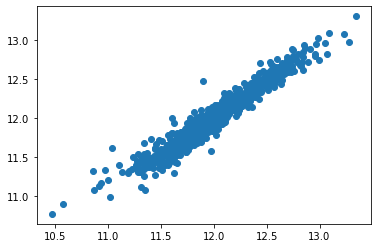

In [1674]:
predictions1 = lm.predict(X_train)
plt.scatter(y_train,predictions1)

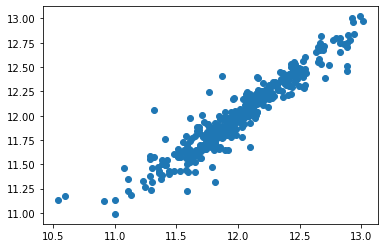

In [1675]:
predictions2 = lm.predict(X_test)
plt.scatter(y_test,predictions2)

Text(0.5, 0, 'Errors')

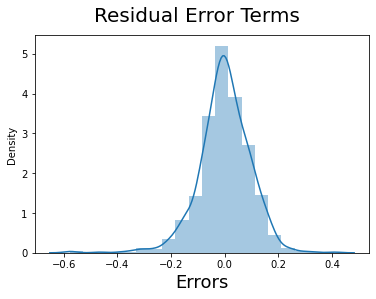

In [1676]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

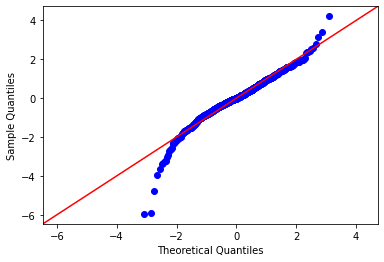

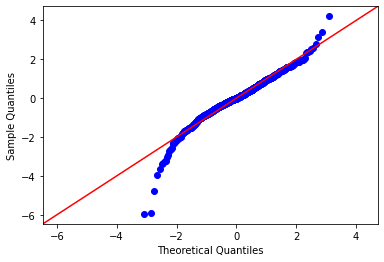

In [1677]:
import statsmodels.api as sm
sm.qqplot(res, fit=True,line='45')

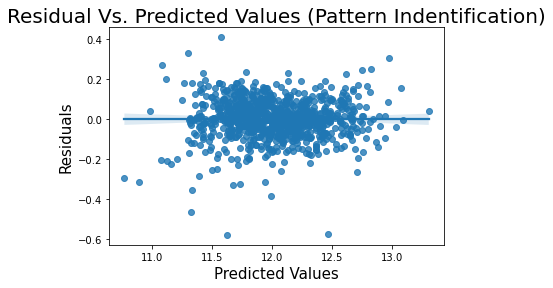

In [1678]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [1679]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lm, X_train, y_train, cv=5)

print('Training Score:', lm.score(X_train, y_train))
print('Cross validation scores:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', lm.score(X_test, y_test))

Training Score: 0.9342640487803442
Cross validation scores: [0.88115711 0.9330738  0.91522094 0.85210983 0.86154358]
Mean cross validation score: 0.8886210536998765
Test Score: 0.896434885316843


In [1680]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

Variable  rfe_support  rfe_ranking
0             OverallQual         True            1
1             OverallCond         True            1
2             TotalBsmtSF         True            1
3               GrLivArea         True            1
4             MSZoning_FV         True            1
5             MSZoning_RH         True            1
6             MSZoning_RL         True            1
7             MSZoning_RM         True            1
8           LotConfig_FR3         True            1
9         Condition1_Norm         True            1
10        Condition1_RRAn         True            1
11        Condition1_RRNn         True            1
12         BldgType_Twnhs         True            1
13      HouseStyle_1.5Unf         True            1
14      HouseStyle_2.5Unf         True            1
15        RoofStyle_Gable         True            1
16      RoofStyle_Gambrel         True            1
17          RoofStyle_Hip         True            1
18      RoofStyle_Mansard         True            1
19    Exterior1st_BrkComm         True            1
20    Exterior1st_BrkFace         True            1
21     Exterior1st_CBlock         True            1
22    Exterior1st_CemntBd         True            1
23    Exterior1st_WdShing         True            1
24    Exterior2nd_AsphShn         True            1
25     Exterior2nd_CBlock         True            1
26    Exterior2nd_CmentBd         True            1
27      Exterior2nd_Other         True            1
28      Exterior2nd_Stone         True            1
29    Exterior2nd_Wd Shng         True            1
30       Foundation_PConc         True            1
31     GarageType_BuiltIn         True            1
32     GarageType_CarPort         True            1
33   GarageType_No Garage         True            1
34           SaleType_CWD         True            1
35           SaleType_Con         True            1
36         SaleType_ConLD         True            1
37         SaleType_ConLI         True            1
38           SaleType_New         True            1
39           SaleType_Oth         True            1
40  SaleCondition_AdjLand         True            1
41   SaleCondition_Normal         True            1
42  SaleCondition_Partial         True            1
43   Neighborhood_Crawfor         True            1
44   Neighborhood_Edwards         True            1
45   Neighborhood_MeadowV         True            1
46   Neighborhood_NridgHt         True            1
47   Neighborhood_OldTown         True            1
48     Neighborhood_SWISU         True            1
49   Neighborhood_Veenker         True            1

In [1681]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [1682]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Ridge Regression

In [1683]:
from sklearn.model_selection import GridSearchCV

In [1684]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1685]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [1686]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.11580333  0.05512754  0.07955355  0.13554627  0.16146602  0.0414463
  0.13590246  0.00326241 -0.01322955  0.05616598  0.04791775  0.02558707
 -0.06345444 -0.05376913 -0.11156417 -0.05452106 -0.0518897  -0.05033119
 -0.03201791 -0.10891623  0.04676027 -0.03478953 -0.0040801   0.07619977
  0.01533301 -0.03478953  0.03407152  0.02962963 -0.04757371 -0.10890592
  0.11155412  0.0399703  -0.00761389 -0.13194218  0.03365029  0.03178578
  0.00131336 -0.04580268  0.05241107  0.04103665  0.01794356  0.06211359
  0.05241107  0.03868613 -0.07486272 -0.03028398  0.08162973 -0.09413792
 -0.13985183  0.06930309]


In [1687]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2_Train:',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_Test:',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train:',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_Test:',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mean_squared_error_train:',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mean_squared_error_test:',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2_Train: 0.8967947220441718
R2_Test: 0.8574113628861914
RSS_Train: 14.344308335926685
RSS_Test: 9.42590885995439
mean_squared_error_train: 0.014787946738068748
mean_squared_error_test: 0.022658434759505745


- Even though R2 score test train showing good values but the ridge regression considere so many predictors into count

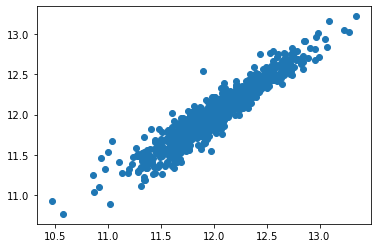

In [1688]:
predictions = ridge.predict(X_train)
plt.scatter(y_train,predictions)

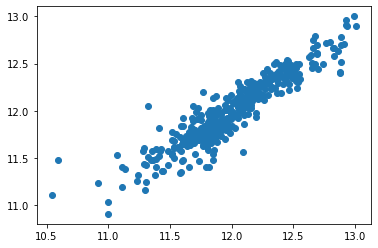

In [1689]:
predictions = ridge.predict(X_test)
plt.scatter(y_test,predictions)

In [1690]:
# Cross-Validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [1691]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
# Ridge Cross-Validation
ridge_mod = RidgeCV(alphas=np.logspace(-100, 100, 100), cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Best Ridge alpha: 10.235310218990268
Training score: 0.8927170389059785
Test Score: 0.8557199701214401


In [1692]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             OverallQual       0.1158
1             OverallCond       0.0551
2             TotalBsmtSF       0.0796
3               GrLivArea       0.1355
4             MSZoning_FV       0.1615
5             MSZoning_RH       0.0414
6             MSZoning_RL       0.1359
7             MSZoning_RM       0.0033
8           LotConfig_FR3      -0.0132
9         Condition1_Norm       0.0562
10        Condition1_RRAn       0.0479
11        Condition1_RRNn       0.0256
12         BldgType_Twnhs      -0.0635
13      HouseStyle_1.5Unf      -0.0538
14      HouseStyle_2.5Unf      -0.1116
15        RoofStyle_Gable      -0.0545
16      RoofStyle_Gambrel      -0.0519
17          RoofStyle_Hip      -0.0503
18      RoofStyle_Mansard      -0.0320
19    Exterior1st_BrkComm      -0.1089
20    Exterior1st_BrkFace       0.0468
21     Exterior1st_CBlock      -0.0348
22    Exterior1st_CemntBd      -0.0041
23    Exterior1st_WdShing       0.0762
24    Exterior2nd_AsphShn       0.0153
25     Exterior2nd_CBlock      -0.0348
26    Exterior2nd_CmentBd       0.0341
27      Exterior2nd_Other       0.0296
28      Exterior2nd_Stone      -0.0476
29    Exterior2nd_Wd Shng      -0.1089
30       Foundation_PConc       0.1116
31     GarageType_BuiltIn       0.0400
32     GarageType_CarPort      -0.0076
33   GarageType_No Garage      -0.1319
34           SaleType_CWD       0.0337
35           SaleType_Con       0.0318
36         SaleType_ConLD       0.0013
37         SaleType_ConLI      -0.0458
38           SaleType_New       0.0524
39           SaleType_Oth       0.0410
40  SaleCondition_AdjLand       0.0179
41   SaleCondition_Normal       0.0621
42  SaleCondition_Partial       0.0524
43   Neighborhood_Crawfor       0.0387
44   Neighborhood_Edwards      -0.0749
45   Neighborhood_MeadowV      -0.0303
46   Neighborhood_NridgHt       0.0816
47   Neighborhood_OldTown      -0.0941
48     Neighborhood_SWISU      -0.1399
49   Neighborhood_Veenker       0.0693

In [1693]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
0             OverallQual  11.808199
5             MSZoning_RH   0.161466
7             MSZoning_RM   0.135902
4             MSZoning_FV   0.135546
1             OverallCond   0.115803
31     GarageType_BuiltIn   0.111554
47   Neighborhood_OldTown   0.081630
3               GrLivArea   0.079554
24    Exterior2nd_AsphShn   0.076200
42  SaleCondition_Partial   0.062114

# Lasso Regression

In [1694]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1695]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1696]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [1697]:
lasso.coef_

array([ 0.11234886,  0.05426007,  0.0784338 ,  0.13733592,  0.28969168,
        0.16414049,  0.2524869 ,  0.1211193 , -0.        ,  0.0586495 ,
        0.05191294,  0.02205835, -0.07003753, -0.05964853, -0.13921789,
       -0.12118194, -0.12784795, -0.1154579 , -0.10120739, -0.26663643,
        0.04650668, -0.07764682, -0.        ,  0.10228385,  0.        ,
       -0.00042735,  0.03078568,  0.02788068, -0.06793456, -0.12999746,
        0.11220733,  0.03897313, -0.        , -0.13757349,  0.02954666,
        0.01836309,  0.02119828, -0.0575627 ,  0.04918353,  0.0442553 ,
        0.        ,  0.05739445,  0.04905549,  0.04127671, -0.07519937,
       -0.03165199,  0.09095738, -0.09672262, -0.16235477,  0.0895813 ])

In [1698]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score_train:',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score_test:',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_Train:',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_Test:',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mean_squared_error_train:',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mean_squared_error_test:',mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_score_train: 0.8994063288833463
r2_score_test: 0.8589047463009525
RSS_Train: 13.981325991463972
RSS_Test: 9.327187838101366
mean_squared_error_train: 0.01441373813552987
mean_squared_error_test: 0.022421124610820593


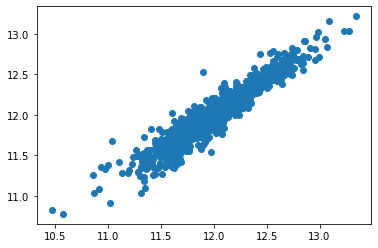

In [1699]:
predictions = lasso.predict(X_train)
plt.scatter(y_train,predictions)

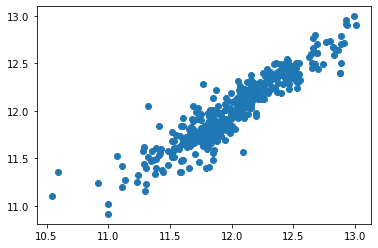

In [1700]:
predictions = lasso.predict(X_test)
plt.scatter(y_test,predictions)

In [1701]:
# Lasso Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-10, 10, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.0004641588833612782
Training score: 0.893594367772284
Test Score: 0.8567991957040472


In [1702]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.934264          0.896795          0.899406
1   R2 Score (Test)           0.896435          0.857411          0.858905
2       RSS (Train)           9.136517         14.344308         13.981326
3        RSS (Test)           6.846235          9.425909          9.327188
4       MSE (Train)           0.097052          0.121606          0.120057
5        MSE (Test)           0.128286          0.150527          0.149737

In [1703]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = house_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0        MSSubClass  11.760857
5       OverallCond   0.289692
7         ExterCond   0.252487
6         ExterQual   0.164140
4       OverallQual   0.137336
8          BsmtQual   0.121119
1       LotFrontage   0.112349
31      MSZoning_FV   0.112207
24      OpenPorchSF   0.102284
47  Condition1_RRAn   0.090957

In [1704]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             OverallQual       0.1123
1             OverallCond       0.0543
2             TotalBsmtSF       0.0784
3               GrLivArea       0.1373
4             MSZoning_FV       0.2897
5             MSZoning_RH       0.1641
6             MSZoning_RL       0.2525
7             MSZoning_RM       0.1211
8         Condition1_Norm       0.0586
9         Condition1_RRAn       0.0519
10        Condition1_RRNn       0.0221
11         BldgType_Twnhs      -0.0700
12      HouseStyle_1.5Unf      -0.0596
13      HouseStyle_2.5Unf      -0.1392
14        RoofStyle_Gable      -0.1212
15      RoofStyle_Gambrel      -0.1278
16          RoofStyle_Hip      -0.1155
17      RoofStyle_Mansard      -0.1012
18    Exterior1st_BrkComm      -0.2666
19    Exterior1st_BrkFace       0.0465
20     Exterior1st_CBlock      -0.0776
21    Exterior1st_WdShing       0.1023
22     Exterior2nd_CBlock      -0.0004
23    Exterior2nd_CmentBd       0.0308
24      Exterior2nd_Other       0.0279
25      Exterior2nd_Stone      -0.0679
26    Exterior2nd_Wd Shng      -0.1300
27       Foundation_PConc       0.1122
28     GarageType_BuiltIn       0.0390
29   GarageType_No Garage      -0.1376
30           SaleType_CWD       0.0295
31           SaleType_Con       0.0184
32         SaleType_ConLD       0.0212
33         SaleType_ConLI      -0.0576
34           SaleType_New       0.0492
35           SaleType_Oth       0.0443
36   SaleCondition_Normal       0.0574
37  SaleCondition_Partial       0.0491
38   Neighborhood_Crawfor       0.0413
39   Neighborhood_Edwards      -0.0752
40   Neighborhood_MeadowV      -0.0317
41   Neighborhood_NridgHt       0.0910
42   Neighborhood_OldTown      -0.0967
43     Neighborhood_SWISU      -0.1624
44   Neighborhood_Veenker       0.0896

In [1705]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1706]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df

Features  rfe_support  rfe_ranking  Coefficient
1          MSZoning_FV         True            1     0.289692
3          MSZoning_RL         True            1     0.252487
2          MSZoning_RH         True            1     0.164140
4          MSZoning_RM         True            1     0.121119
0          OverallQual         True            1     0.112349
12   Exterior2nd_Other         True            1     0.027881
11  Exterior2nd_CBlock         True            1    -0.000427
9    RoofStyle_Mansard         True            1    -0.101207
8        RoofStyle_Hip         True            1    -0.115458
6      RoofStyle_Gable         True            1    -0.121182

In [1707]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.896795          0.899406
1    R2Score Test          0.857411          0.858905
2       RSS Train         14.344308         13.981326
3        RSS Test          9.425909          9.327188
4       MSE Train          0.121606          0.120057
5        MSE Test          0.150527          0.149737

##### both ridge and lasso R2 score very similar to each other. but RSS train has noticeable difference.

In [1708]:
# Best Feature explain by the model

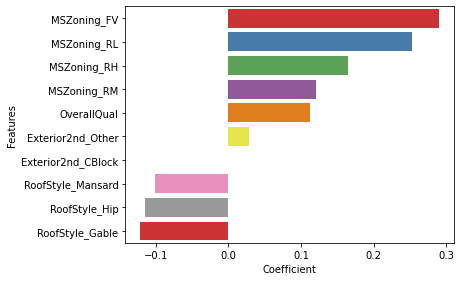

In [1709]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()


## Conclusion :
 
##### significant variables in predicting the price of a house and How well those variables describe the price of a house:
 
- MSZoning_FV :Floating Village Residential also has significant effect in the sales price.
- GrLivArea	  :Above grade (ground) living area square feet also has significant increase in the sales price.
- MSZoning_RL : Residential Low Density is good then it will also has significant effect on sales price.
- OverallQual : Quality of over all house also has significant increase in the sales price.
- Foundation_PConc: Poured Contrete foundation has also significant impact on the sales price
- TotalBsmtSF	:Total square feet of basement area is also a reason to increase in salesprice
- OverallCond : If the Overall Condition is Excellent the SalePrice is higher	
- SaleCondition_Normal: Normal Sale when compared to othersales has an improvement in the sales price
- Neighborhood_NridgHt
- Neighborhood_Crawfor: Neighbourhod Crawford and Northridge Heights also place a role in increase the sales price.

###### If they concentrating/investing on these varibles well they can notice significant increase in the sales price.
 
##### The optimal lambda/alpha value in case of Ridge and Lasso is as below:

- Ridge - 3.0
- Lasso - 0.0001

##### The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 0.121606
- Lasso - 0.120057
  The Mean Squared Error of ridge is slightly lower than that of lasso

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, 
Overall quality , condition of the house, Foundation type of the house, Total basement area in square feet,neighbourhood etc 

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

## PART 2 - Subjective Questions

# Question 1
- 1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### Optimal Value of alpha for Ridge
 - Ridge - 3.0
 - Lasso - 0.0001
##### Double the values of alpha
 - Ridge - 9.0
 - Lasso - 0.0002
Lets analyze the model with these alpha values

In [1710]:
# Ridge regression
ridge = Ridge(alpha=9.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.12054214  0.05469482  0.081001    0.13334592  0.10436833 -0.00357306
  0.09090972 -0.0452415  -0.00328967  0.05176032  0.0355817   0.01125744
 -0.05153018 -0.03797759 -0.06584942 -0.02573174 -0.01821128 -0.02158006
 -0.00701791 -0.04724952  0.03992563 -0.01596175  0.00597637  0.0398859
  0.00629893 -0.01596175  0.01940138  0.01119955 -0.0216402  -0.0780623
  0.10913804  0.03959507 -0.00416183 -0.12115043  0.01672465  0.01405399
 -0.00696109 -0.02499243  0.05090635  0.01858328  0.00668297  0.05755252
  0.05090635  0.03278786 -0.06802273 -0.01834522  0.06661819 -0.08574186
 -0.10635502  0.04164382]


In [1711]:
#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

r2_train:
0.8932360745025834
r2_test:
0.8559293259265607
RSS_train:
14.838918094327616
RSS_test:
9.523879817467737
MSE_train:
0.015297853705492387
MSE_test:
0.022893941868912828


In [1712]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

Features  Coefficient
0             OverallQual       0.1205
1             OverallCond       0.0547
2             TotalBsmtSF       0.0810
3               GrLivArea       0.1333
4             MSZoning_FV       0.1044
5             MSZoning_RH      -0.0036
6             MSZoning_RL       0.0909
7             MSZoning_RM      -0.0452
8           LotConfig_FR3      -0.0033
9         Condition1_Norm       0.0518
10        Condition1_RRAn       0.0356
11        Condition1_RRNn       0.0113
12         BldgType_Twnhs      -0.0515
13      HouseStyle_1.5Unf      -0.0380
14      HouseStyle_2.5Unf      -0.0658
15        RoofStyle_Gable      -0.0257
16      RoofStyle_Gambrel      -0.0182
17          RoofStyle_Hip      -0.0216
18      RoofStyle_Mansard      -0.0070
19    Exterior1st_BrkComm      -0.0472
20    Exterior1st_BrkFace       0.0399
21     Exterior1st_CBlock      -0.0160
22    Exterior1st_CemntBd       0.0060
23    Exterior1st_WdShing       0.0399
24    Exterior2nd_AsphShn       0.0063
25     Exterior2nd_CBlock      -0.0160
26    Exterior2nd_CmentBd       0.0194
27      Exterior2nd_Other       0.0112
28      Exterior2nd_Stone      -0.0216
29    Exterior2nd_Wd Shng      -0.0781
30       Foundation_PConc       0.1091
31     GarageType_BuiltIn       0.0396
32     GarageType_CarPort      -0.0042
33   GarageType_No Garage      -0.1212
34           SaleType_CWD       0.0167
35           SaleType_Con       0.0141
36         SaleType_ConLD      -0.0070
37         SaleType_ConLI      -0.0250
38           SaleType_New       0.0509
39           SaleType_Oth       0.0186
40  SaleCondition_AdjLand       0.0067
41   SaleCondition_Normal       0.0576
42  SaleCondition_Partial       0.0509
43   Neighborhood_Crawfor       0.0328
44   Neighborhood_Edwards      -0.0680
45   Neighborhood_MeadowV      -0.0183
46   Neighborhood_NridgHt       0.0666
47   Neighborhood_OldTown      -0.0857
48     Neighborhood_SWISU      -0.1064
49   Neighborhood_Veenker       0.0416

In [1713]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0             OverallQual  11.832356
4             MSZoning_FV   0.133346
1             OverallCond   0.120542
31     GarageType_BuiltIn   0.109138
5             MSZoning_RH   0.104368
7             MSZoning_RM   0.090910
3               GrLivArea   0.081001
47   Neighborhood_OldTown   0.066618
42  SaleCondition_Partial   0.057553
2             TotalBsmtSF   0.054695

- Here we have got Zoning, Condition1, Saletype condition, Exterios

In [1714]:
# Lasso Regression:

lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

#r2 train
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

#r2 test
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))



0.8822573789396888
0.8505126187561965


In [1715]:
# prnitng R2, RSS, MSE of test train when we double the alpha value for Lasso
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric5=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric5.append(mse_test_lr)

r2_train:
0.8822573789396888
r2_test:
0.8505126187561965
RSS_train:
16.364826433509954
RSS_test:
9.881954550085885
MSE_train:
0.016870955086092737
MSE_test:
0.023754698437706452


In [1716]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lm.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0             OverallQual       0.1304
1             OverallCond       0.0533
2             TotalBsmtSF       0.0837
3               GrLivArea       0.1340
4             MSZoning_FV       0.0671
5             MSZoning_RL       0.0848
6             MSZoning_RM      -0.0558
7         Condition1_Norm       0.0367
8     Exterior2nd_Wd Shng      -0.0111
9        Foundation_PConc       0.1076
10     GarageType_BuiltIn       0.0124
11   GarageType_No Garage      -0.1182
12           SaleType_New       0.0610
13   SaleCondition_Normal       0.0272
14  SaleCondition_Partial       0.0060
15   Neighborhood_Edwards      -0.0454
16   Neighborhood_NridgHt       0.0235
17   Neighborhood_OldTown      -0.0689
18     Neighborhood_SWISU      -0.0561

- here we have got 20 features

In [1717]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [1718]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))

# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
df = df.sort_values(by=['Coefficient'], ascending=False)
df = df.head(10)
df


Features  rfe_support  rfe_ranking  Coefficient
4            MSZoning_FV         True            1     0.192377
5            MSZoning_RL         True            1     0.161683
3              GrLivArea         True            1     0.139264
0            OverallQual         True            1     0.114159
7       Foundation_PConc         True            1     0.108343
2            TotalBsmtSF         True            1     0.082526
12  Neighborhood_NridgHt         True            1     0.074505
10  SaleCondition_Normal         True            1     0.060576
1            OverallCond         True            1     0.058805
9           SaleType_New         True            1     0.054445

In [1719]:
#### Comparing the Ridge and Lasso after double the vlaues of alpha 

In [1720]:
#Comparing results of Ridge and Lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric4}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric5, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

Metric  Ridge regression  Lasso regression
0  R2 Score Train          0.893236          0.882257
1    R2Score Test          0.855929          0.850513
2       RSS Train         14.838918         16.364826
3        RSS Test          9.523880          9.881955
4       MSE Train          0.015298          0.016871
5        MSE Test          0.022894          0.023755

Here Lasso given the very close result of R2 score for both test and train.
The most important feature after double the value of alpha is
- MSZoning_FV
- MSZoning_RL
- GrLivArea
- OverallQual	
- TotalBsmtSF	
- Neighborhood_Crawfor
- Foundation_PConc	
- Neighborhood_NridgHt
- SaleCondition_Normal	
- GarageCars	
- OverallCond	
- SaleType_New

# Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. 
Now, which one will you choose to apply and why?

Ans: Based on the alpha/Lambda values I have got, Ridge regression does not zero any of the co efficient, Lasso zeroed one or two coefficients in the selected features, Lasso is better option and it also helps in the some of the feature elimination.

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1721]:
houseLasso = houseNew
houseLasso = houseLasso.drop(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"], axis=1)


In [1722]:
df_train, df_test = train_test_split(houseLasso, train_size=0.7,test_size = 0.3, random_state=100)

In [1723]:
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [1724]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [1725]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [1726]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

Variable  rfe_support  rfe_ranking
0             TotalBsmtSF         True            1
1                1stFlrSF         True            1
2                2ndFlrSF         True            1
3             KitchenQual         True            1
4       HouseStyle_1.5Unf         True            1
5       HouseStyle_1Story         True            1
6       HouseStyle_2.5Fin         True            1
7       HouseStyle_2.5Unf         True            1
8         RoofStyle_Gable         True            1
9       RoofStyle_Gambrel         True            1
10          RoofStyle_Hip         True            1
11      RoofStyle_Mansard         True            1
12    Exterior1st_BrkComm         True            1
13    Exterior1st_BrkFace         True            1
14    Exterior1st_ImStucc         True            1
15    Exterior1st_WdShing         True            1
16    Exterior2nd_AsphShn         True            1
17    Exterior2nd_CmentBd         True            1
18    Exterior2nd_HdBoard         True            1
19    Exterior2nd_MetalSd         True            1
20      Exterior2nd_Other         True            1
21    Exterior2nd_Plywood         True            1
22     Exterior2nd_Stucco         True            1
23    Exterior2nd_VinylSd         True            1
24    Exterior2nd_Wd Sdng         True            1
25      GarageType_Attchd         True            1
26     GarageType_Basment         True            1
27     GarageType_BuiltIn         True            1
28      GarageType_Detchd         True            1
29           SaleType_CWD         True            1
30           SaleType_Con         True            1
31         SaleType_ConLI         True            1
32           SaleType_New         True            1
33           SaleType_Oth         True            1
34  SaleCondition_AdjLand         True            1
35   SaleCondition_Normal         True            1
36  SaleCondition_Partial         True            1
37   Neighborhood_Blueste         True            1
38    Neighborhood_BrDale         True            1
39   Neighborhood_BrkSide         True            1
40   Neighborhood_ClearCr         True            1
41   Neighborhood_Edwards         True            1
42    Neighborhood_IDOTRR         True            1
43   Neighborhood_MeadowV         True            1
44     Neighborhood_NAmes         True            1
45   Neighborhood_NoRidge         True            1
46   Neighborhood_NridgHt         True            1
47   Neighborhood_OldTown         True            1
48     Neighborhood_SWISU         True            1
49    Neighborhood_Sawyer         True            1

In [1727]:
# Assign the 50 columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

#### perform LAsso to new model after dropping the five imp features

In [1728]:
# Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))



0.8488474074125654
0.8314465751949509


In [1729]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)

0.8488474074125654
0.8314465751949509
21.008415817424066
11.142326993261566
0.021658160636519656
0.026784439887647997


In [1730]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)
#(["MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"]#

Featuere       Coef
0         MSSubClass  11.546662
4        OverallCond   0.143045
26      IsRemodelled   0.137121
3           LotShape   0.134221
28    OldOrNewGarage   0.129265
2            LotArea   0.119874
1        LotFrontage   0.087476
36     LotConfig_FR3   0.073304
37  LotConfig_Inside   0.065800
47   BldgType_Duplex   0.062690

After removing the five most important fetaure that we have got prior "MSZoning_FV", "GrLivArea", "MSZoning_RL", "OverallQual", "Foundation_PConc"
I have got the other important fetaures to predict the sales price with Overall condition, Lot area, shape, Condition1, IsRemodeled.